In [1]:
import numpy as np
import scipy as sc
from scipy import linalg
from scipy import spatial
import scipy.spatial.distance
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager
import pylab
import json
import os


In [3]:
def rosenparse():
    with open('N02-18_GML/N02-18_RailroadSection.geojson',encoding="utf-8") as f:
        l = json.load(f)
    cd = 'rosenjson/'
    for i in l.get("features"):
        if os.path.isfile(cd+i.get('properties').get('N02_004')+'_'+i.get('properties').get('N02_003')+'.json') == False :
            with open(cd+i.get('properties').get('N02_004')+'_'+i.get('properties').get('N02_003')+'.json',encoding="utf-8",mode='w') as f:
                f.write('['+json.dumps(i)+']')
        else :
            with open(cd+i.get('properties').get('N02_004')+'_'+i.get('properties').get('N02_003')+'.json',mode='ab+') as f:
                f.seek(-1,2)                           # ファイルの末尾（2）から -1 文字移動
                f.truncate()                           # 最後の文字を削除し、JSON 配列を開ける（]の削除）
                f.write(' , '.encode())                # 配列のセパレーターを書き込む
                f.write(json.dumps(i).encode())     # 辞書を JSON 形式でダンプ書き込み
                f.write(']'.encode())     
    print("finish")

In [4]:
def ekiparse():
    cd = 'rosenekijson/'
    with open('N02-18_GML/N02-18_Station.geojson',encoding="utf-8") as f:
        l = json.load(f)
    for i in l.get("features"):
        if os.path.isfile(cd+i.get('properties').get('N02_004')+'_'+i.get('properties').get('N02_003')+'.json') == False :
            with open(cd+i.get('properties').get('N02_004')+'_'+i.get('properties').get('N02_003')+'.json',encoding="utf-8",mode='w') as f:
                f.write('['+json.dumps(i)+']')
        else :
            with open(cd+i.get('properties').get('N02_004')+'_'+i.get('properties').get('N02_003')+'.json',mode='ab+') as f:
                f.seek(-1,2)                           # ファイルの末尾（2）から -1 文字移動
                f.truncate()                           # 最後の文字を削除し、JSON 配列を開ける（]の削除）
                f.write(' , '.encode())                # 配列のセパレーターを書き込む
                f.write(json.dumps(i).encode())     # 辞書を JSON 形式でダンプ書き込み
                f.write(']'.encode())     
    print("finish")

In [7]:
def jidoinstance():
    cd1 ='rosenjson/'
    cd2 = 'rosenekijson/'
    for i in  os.listdir(path=cd1):
        if os.path.isfile(cd2+i) == True :
            print (i.rstrip('.json')+'=rosen("'+cd1+i+'","'+cd2+i+'")')
    

In [19]:
jidoinstance()

沖縄都市モノレール_沖縄都市モノレール線=rosen("rosenjson/沖縄都市モノレール_沖縄都市モノレール線.json","rosenekijson/沖縄都市モノレール_沖縄都市モノレール線.json")
アイジーアールいわて銀河鉄道_いわて銀河鉄道線=rosen("rosenjson/アイジーアールいわて銀河鉄道_いわて銀河鉄道線.json","rosenekijson/アイジーアールいわて銀河鉄道_いわて銀河鉄道線.json")
いすみ鉄道_いすみ線=rosen("rosenjson/いすみ鉄道_いすみ線.json","rosenekijson/いすみ鉄道_いすみ線.json")
えちぜん鉄道_三国芦原線=rosen("rosenjson/えちぜん鉄道_三国芦原線.json","rosenekijson/えちぜん鉄道_三国芦原線.json")
えちぜん鉄道_勝山永平寺線=rosen("rosenjson/えちぜん鉄道_勝山永平寺線.json","rosenekijson/えちぜん鉄道_勝山永平寺線.json")
くま川鉄道_湯前線=rosen("rosenjson/くま川鉄道_湯前線.json","rosenekijson/くま川鉄道_湯前線.json")
しなの鉄道_しなの鉄道線=rosen("rosenjson/しなの鉄道_しなの鉄道線.json","rosenekijson/しなの鉄道_しなの鉄道線.json")
スカイレールサービス_広島短距離交通瀬野線=rosen("rosenjson/スカイレールサービス_広島短距離交通瀬野線.json","rosenekijson/スカイレールサービス_広島短距離交通瀬野線.json")
のと鉄道_七尾線=rosen("rosenjson/のと鉄道_七尾線.json","rosenekijson/のと鉄道_七尾線.json")
わたらせ渓谷鐵道_わたらせ渓谷線=rosen("rosenjson/わたらせ渓谷鐵道_わたらせ渓谷線.json","rosenekijson/わたらせ渓谷鐵道_わたらせ渓谷線.json")
阿佐海岸鉄道_阿佐東線=rosen("rosenjson/阿佐海岸鉄道_阿佐東線.json","rosenekijson/阿佐海岸鉄道_阿佐東線.json")
阿武隈急行_阿武隈急行線=rosen

In [56]:
class rosen():
    divide = 2
    ekiData= []
    rosenData=[]
    ekiDict=[]
    rosenAvg=[0,0]
    rosenStd=[0,0]
    invR=[]
    R=[]
    x_return = []
    ekiData2=np.array([])
    rosenData2=np.array([])
    div = 1000
    curve_c = np.zeros((2,div+1))
    def __init__(self, rosenurl,ekiurl):
        self.ekiurl  = ekiurl
        self.rosenurl  = rosenurl
        self.rosenMahaUrl  = "rosenmaha/"+rosenurl.lstrip('rosenjson/')
        self.ekiMahaUrl  = "ekimaha/"+rosenurl.lstrip('rosenjson/')
        self.ekiData= []
        self.rosenData= []
        self.ekiDetailData=[]
        self.ekiDict=[]
        self.rosenAvg=[0,0]
        self.rosenStd=[0,0]
        self.ekiAvg=[]
        self.ekiStd=[]
        self.ekiInvR=[]
        self.ekiInvR2=[]
        self.ekiname=[]
        self.curve_c = np.zeros((2,self.div+1))
        self. x_return =[]
        self.R = np.zeros((self.divide,self.divide))
        self.rosenInvR=np.zeros((self.divide,self.divide))
        self.ekiInvR=np.zeros((self.divide,self.divide))
        self.getData()
        self.daen()
        


    def getData(self):
        with open(self.rosenurl,encoding="utf-8") as f:
            l = json.load(f)
            for i in l:
                for j in i.get("geometry").get("coordinates"):
                    self.rosenData.append(j)
            self.rosenData2 = np.copy(self.rosenData)
        if os.path.isfile(self.rosenMahaUrl) == True :
            with open(self.rosenMahaUrl,encoding="utf-8") as f:
                l = json.load(f)
                self.rosenAvg=l.get('Avg')
                self.rosenStd=l.get('Std')
                self.rosenInvR=l.get('InvR')
        else :
            self.avg(self.rosenMahaUrl) 
        with open(self.ekiurl,encoding="utf-8") as f:
            l = json.load(f)
            self.ekiDict = l
            for i in l:
                for j in i.get("geometry").get("coordinates"):
                    self.ekiData.append(j)
            self.ekiData2 = np.copy(self.ekiData)
        if os.path.isfile(self.ekiMahaUrl) == True :
            with open(self.ekiMahaUrl,encoding="utf-8") as f:
                l = json.load(f)
                x = 0
                for i in l:
                    self.ekiAvg.append(i.get('Avg'))
                    self.ekiStd.append(i.get('Std'))
                    self.ekiInvR2.append(i.get('InvR'))
                    self.ekiname.append(i.get('name'))
                    x = x + 1
        else :
            self.ekiavg(self.ekiMahaUrl) 
    def avg(self,url):
        url = url
        for i in range(self.divide):
            sumx = 0
            tmp =[]
            for j in range(len(self.rosenData)):
                tmp.append(self.rosenData[j][i])
                sumx = sumx + self.rosenData[j][i]
            self.rosenAvg[i] = sumx / len(self.rosenData)
            self.rosenStd[i] = np.std(tmp)          
        self.rosenMaha(url)
    def ekiavg(self,url):
        url = url
        for ia in range(len(self.ekiDict)):
            i = self.ekiDict[ia]
            addAvg=[]
            addStd=[]
            addlist1=[]
            addlist2=[]
            for j in range(self.divide):
                sumx = 0
                tmp =[]
                x = i.get("geometry").get("coordinates")
                for k in x :                      
                    tmp.append(k[j])
                    sumx = sumx + k[j]
                addAvg.append(sumx / len(i.get("geometry").get("coordinates")))
                tmp.append(sumx / len(i.get("geometry").get("coordinates"))- 0.0002)
                tmp.append(sumx / len(i.get("geometry").get("coordinates"))+ 0.0002)
                addlist1.append(sumx / len(i.get("geometry").get("coordinates"))- 0.0002)
                addlist2.append(sumx / len(i.get("geometry").get("coordinates"))+ 0.0002)
                ansst = np.std(tmp)
                if ansst < 0.0001:
                    ansst = 0.0001
                addStd.append(ansst) 
            self.ekiAvg.append(addAvg)
            self.ekiStd.append(addStd)
            self.ekiDict[ia].get("geometry").get("coordinates").append(addlist1)
            self.ekiDict[ia].get("geometry").get("coordinates").append(addlist2)
        self.ekiMaha(url)
    def rosenMaha(self,url):
        url= url
        x = np.copy(self.rosenData)
        for i in range(self.divide):
            for j in range(len(self.rosenData)):
                x[j][i] = x[j][i] - self.rosenAvg[i]
                x[j][i] = x[j][i] / self.rosenStd[i]
        R = np.corrcoef(x.transpose())
        self.rosenInvR = np.linalg.inv(R)
        tmp = {}
        with open(url,encoding="utf-8",mode='w' ) as f:
            tmp = {}
            tmp["Avg"] =  self.rosenAvg
            tmp["Std"]= self.rosenStd
            tmp["InvR"]= self.rosenInvR.tolist()
            tmp["name"]= self.rosenurl.lstrip('rosenjson/').rstrip('.json')
            json.dump(tmp,f)
        with open('rosenmaha/rosenmaha.json',mode='ab+' ) as f:
            f.seek(-1,2)                           # ファイルの末尾（2）から -1 文字移動
            f.truncate()                           # 最後の文字を削除し、JSON 配列を開ける（]の削除）
            f.write(' , '.encode())                # 配列のセパレーターを書き込む
            f.write(json.dumps(tmp).encode())     # 辞書を JSON 形式でダンプ書き込み
            f.write(']'.encode())  
    def ekiMaha(self,url):
        url= url
        for i in range(len(self.ekiDict)):
            j = self.ekiDict[i].get("geometry").get("coordinates")
            x = np.copy(j)
            for k in range(self.divide):
                for l in range(len(x)):
                    print(i)
                    x[l][k] = x[l][k] - self.ekiAvg[i][k]
                    if x[l][k] == 0:
                        x[l][k] = x[l][k] + 0.00002
                    x[l][k] = x[l][k] / self.ekiStd[i][k]
            R = np.corrcoef(x.transpose())
            addlist3=np.linalg.pinv(R).tolist()
            self.ekiInvR2.append(addlist3)
            if i == 0:
                with open(url,encoding="utf-8",mode='x' ) as f:
                    f.write("[")
                    tmp = {}
                    tmp["Avg"] =  self.ekiAvg[i]
                    tmp["Std"]= self.ekiStd[i]
                    tmp["InvR"]= addlist3
                    tmp["name"]= self.ekiDict[i].get("properties").get("N02_005")
                    json.dump(tmp,f)
                    f.write("]")
            else:
                with open(url,mode='ab+' ) as f:
                    tmp = {}
                    tmp["Avg"] =  self.ekiAvg[i]
                    tmp["Std"]= self.ekiStd[i]
                    tmp["InvR"]= addlist3
                    tmp["name"]= self.ekiDict[i].get("properties").get("N02_005")
                    f.seek(-1,2)                           # ファイルの末尾（2）から -1 文字移動
                    f.truncate()                           # 最後の文字を削除し、JSON 配列を開ける（]の削除）
                    f.write(' , '.encode())                # 配列のセパレーターを書き込む
                    f.write(json.dumps(tmp).encode())     # 辞書を JSON 形式でダンプ書き込み
                    f.write(']'.encode())  
    def daen(self):
        low = np.corrcoef(self.ekiData2[:,0],self.ekiData2[:,1])[0,1]
        p = 0.97
        for i in range(self.div+1):
            r = (-2*(1-low**2)*np.log(1-p)/(1-2*low*np.sin(i*2*np.pi/self.div)*np.cos(i*2*np.pi/self.div)))**0.5
            self.curve_c[0,i] = self.rosenAvg[0] + self.rosenStd[0]*r*np.cos(i*2*np.pi/self.div)
            self.curve_c[1,i] = self.rosenAvg[1] + self.rosenStd[1]*r*np.sin(i*2*np.pi/self.div)
    def getRosenMaha(self,position):
        self.x_return=[]
        x = np.copy(position)
        for i in range(self.divide):
            x[i] = x[i] - self.rosenAvg[i]
            x[i] = x[i] / self.rosenStd[i]
        d0 = x
        d1 = np.dot(d0,self.rosenInvR)
        d2 = np.dot(d1,d0)/self.divide
        self.x_return.append(d2)
        return d2
    def getEki(self,position):
        lenreturn=[]
        for j in range(len(self.ekiAvg)):
            x = np.copy(position)
            for i in range(self.divide):
                x[i] = x[i] - self.ekiAvg[j][i]
                x[i] = x[i] / self.ekiStd[j][i]
            d0 = x
            d1 = np.dot(d0,self.ekiInvR)
            d2 = np.dot(d1,d0)/self.divide
            if d2 < 2.48:
                return (self.ekiDict[j].get("name"))

In [57]:
沖縄都市モノレール_沖縄都市モノレール線=rosen("rosenjson/沖縄都市モノレール_沖縄都市モノレール線.json","rosenekijson/沖縄都市モノレール_沖縄都市モノレール線.json")
アイジーアールいわて銀河鉄道_いわて銀河鉄道線=rosen("rosenjson/アイジーアールいわて銀河鉄道_いわて銀河鉄道線.json","rosenekijson/アイジーアールいわて銀河鉄道_いわて銀河鉄道線.json")
いすみ鉄道_いすみ線=rosen("rosenjson/いすみ鉄道_いすみ線.json","rosenekijson/いすみ鉄道_いすみ線.json")
えちぜん鉄道_三国芦原線=rosen("rosenjson/えちぜん鉄道_三国芦原線.json","rosenekijson/えちぜん鉄道_三国芦原線.json")
えちぜん鉄道_勝山永平寺線=rosen("rosenjson/えちぜん鉄道_勝山永平寺線.json","rosenekijson/えちぜん鉄道_勝山永平寺線.json")
くま川鉄道_湯前線=rosen("rosenjson/くま川鉄道_湯前線.json","rosenekijson/くま川鉄道_湯前線.json")
しなの鉄道_しなの鉄道線=rosen("rosenjson/しなの鉄道_しなの鉄道線.json","rosenekijson/しなの鉄道_しなの鉄道線.json")
スカイレールサービス_広島短距離交通瀬野線=rosen("rosenjson/スカイレールサービス_広島短距離交通瀬野線.json","rosenekijson/スカイレールサービス_広島短距離交通瀬野線.json")
のと鉄道_七尾線=rosen("rosenjson/のと鉄道_七尾線.json","rosenekijson/のと鉄道_七尾線.json")
わたらせ渓谷鐵道_わたらせ渓谷線=rosen("rosenjson/わたらせ渓谷鐵道_わたらせ渓谷線.json","rosenekijson/わたらせ渓谷鐵道_わたらせ渓谷線.json")
阿佐海岸鉄道_阿佐東線=rosen("rosenjson/阿佐海岸鉄道_阿佐東線.json","rosenekijson/阿佐海岸鉄道_阿佐東線.json")
阿武隈急行_阿武隈急行線=rosen("rosenjson/阿武隈急行_阿武隈急行線.json","rosenekijson/阿武隈急行_阿武隈急行線.json")
愛知環状鉄道_愛知環状鉄道線=rosen("rosenjson/愛知環状鉄道_愛知環状鉄道線.json","rosenekijson/愛知環状鉄道_愛知環状鉄道線.json")
愛知高速交通_東部丘陵線=rosen("rosenjson/愛知高速交通_東部丘陵線.json","rosenekijson/愛知高速交通_東部丘陵線.json")
鞍馬寺_鞍馬山鋼索鉄道=rosen("rosenjson/鞍馬寺_鞍馬山鋼索鉄道.json","rosenekijson/鞍馬寺_鞍馬山鋼索鉄道.json")
伊勢鉄道_伊勢線=rosen("rosenjson/伊勢鉄道_伊勢線.json","rosenekijson/伊勢鉄道_伊勢線.json")
伊豆急行_伊豆急行線=rosen("rosenjson/伊豆急行_伊豆急行線.json","rosenekijson/伊豆急行_伊豆急行線.json")
伊豆箱根鉄道_十国鋼索線=rosen("rosenjson/伊豆箱根鉄道_十国鋼索線.json","rosenekijson/伊豆箱根鉄道_十国鋼索線.json")
伊豆箱根鉄道_駿豆線=rosen("rosenjson/伊豆箱根鉄道_駿豆線.json","rosenekijson/伊豆箱根鉄道_駿豆線.json")
伊豆箱根鉄道_大雄山線=rosen("rosenjson/伊豆箱根鉄道_大雄山線.json","rosenekijson/伊豆箱根鉄道_大雄山線.json")
伊予鉄道_横河原線=rosen("rosenjson/伊予鉄道_横河原線.json","rosenekijson/伊予鉄道_横河原線.json")
伊予鉄道_花園線=rosen("rosenjson/伊予鉄道_花園線.json","rosenekijson/伊予鉄道_花園線.json")
伊予鉄道_郡中線=rosen("rosenjson/伊予鉄道_郡中線.json","rosenekijson/伊予鉄道_郡中線.json")
伊予鉄道_高浜線=rosen("rosenjson/伊予鉄道_高浜線.json","rosenekijson/伊予鉄道_高浜線.json")
伊予鉄道_城南線=rosen("rosenjson/伊予鉄道_城南線.json","rosenekijson/伊予鉄道_城南線.json")
伊予鉄道_城北線=rosen("rosenjson/伊予鉄道_城北線.json","rosenekijson/伊予鉄道_城北線.json")
伊予鉄道_大手町線=rosen("rosenjson/伊予鉄道_大手町線.json","rosenekijson/伊予鉄道_大手町線.json")
伊予鉄道_本町線=rosen("rosenjson/伊予鉄道_本町線.json","rosenekijson/伊予鉄道_本町線.json")
井原鉄道_井原線=rosen("rosenjson/井原鉄道_井原線.json","rosenekijson/井原鉄道_井原線.json")
一畑電車_大社線=rosen("rosenjson/一畑電車_大社線.json","rosenekijson/一畑電車_大社線.json")
一畑電車_北松江線=rosen("rosenjson/一畑電車_北松江線.json","rosenekijson/一畑電車_北松江線.json")
叡山電鉄_鞍馬線=rosen("rosenjson/叡山電鉄_鞍馬線.json","rosenekijson/叡山電鉄_鞍馬線.json")
叡山電鉄_叡山本線=rosen("rosenjson/叡山電鉄_叡山本線.json","rosenekijson/叡山電鉄_叡山本線.json")
遠州鉄道_鉄道線=rosen("rosenjson/遠州鉄道_鉄道線.json","rosenekijson/遠州鉄道_鉄道線.json")
横浜高速鉄道_みなとみらい21線=rosen("rosenjson/横浜高速鉄道_みなとみらい21線.json","rosenekijson/横浜高速鉄道_みなとみらい21線.json")
横浜市_1号線=rosen("rosenjson/横浜市_1号線.json","rosenekijson/横浜市_1号線.json")
横浜市_3号線=rosen("rosenjson/横浜市_3号線.json","rosenekijson/横浜市_3号線.json")
横浜シーサイドライン_金沢シーサイドライン=rosen("rosenjson/横浜シーサイドライン_金沢シーサイドライン.json","rosenekijson/横浜シーサイドライン_金沢シーサイドライン.json")
会津鉄道_会津線=rosen("rosenjson/会津鉄道_会津線.json","rosenekijson/会津鉄道_会津線.json")
岡山電気軌道_清輝橋線=rosen("rosenjson/岡山電気軌道_清輝橋線.json","rosenekijson/岡山電気軌道_清輝橋線.json")
岡山電気軌道_東山本線=rosen("rosenjson/岡山電気軌道_東山本線.json","rosenekijson/岡山電気軌道_東山本線.json")
岳南電車_岳南線=rosen("rosenjson/岳南電車_岳南線.json","rosenekijson/岳南電車_岳南線.json")
甘木鉄道_甘木線=rosen("rosenjson/甘木鉄道_甘木線.json","rosenekijson/甘木鉄道_甘木線.json")
関東鉄道_常総線=rosen("rosenjson/関東鉄道_常総線.json","rosenekijson/関東鉄道_常総線.json")
関東鉄道_竜ヶ崎線=rosen("rosenjson/関東鉄道_竜ヶ崎線.json","rosenekijson/関東鉄道_竜ヶ崎線.json")
紀州鉄道_紀州鉄道線=rosen("rosenjson/紀州鉄道_紀州鉄道線.json","rosenekijson/紀州鉄道_紀州鉄道線.json")
京王電鉄_井の頭線=rosen("rosenjson/京王電鉄_井の頭線.json","rosenekijson/京王電鉄_井の頭線.json")
京王電鉄_京王線=rosen("rosenjson/京王電鉄_京王線.json","rosenekijson/京王電鉄_京王線.json")
京王電鉄_競馬場線=rosen("rosenjson/京王電鉄_競馬場線.json","rosenekijson/京王電鉄_競馬場線.json")
京王電鉄_高尾線=rosen("rosenjson/京王電鉄_高尾線.json","rosenekijson/京王電鉄_高尾線.json")
京王電鉄_相模原線=rosen("rosenjson/京王電鉄_相模原線.json","rosenekijson/京王電鉄_相模原線.json")
京王電鉄_動物園線=rosen("rosenjson/京王電鉄_動物園線.json","rosenekijson/京王電鉄_動物園線.json")
京阪電気鉄道_宇治線=rosen("rosenjson/京阪電気鉄道_宇治線.json","rosenekijson/京阪電気鉄道_宇治線.json")
京阪電気鉄道_鴨東線=rosen("rosenjson/京阪電気鉄道_鴨東線.json","rosenekijson/京阪電気鉄道_鴨東線.json")
京阪電気鉄道_京阪本線=rosen("rosenjson/京阪電気鉄道_京阪本線.json","rosenekijson/京阪電気鉄道_京阪本線.json")
京阪電気鉄道_京津線=rosen("rosenjson/京阪電気鉄道_京津線.json","rosenekijson/京阪電気鉄道_京津線.json")
京阪電気鉄道_交野線=rosen("rosenjson/京阪電気鉄道_交野線.json","rosenekijson/京阪電気鉄道_交野線.json")
京阪電気鉄道_鋼索線=rosen("rosenjson/京阪電気鉄道_鋼索線.json","rosenekijson/京阪電気鉄道_鋼索線.json")
京阪電気鉄道_石山坂本線=rosen("rosenjson/京阪電気鉄道_石山坂本線.json","rosenekijson/京阪電気鉄道_石山坂本線.json")
京成電鉄_押上線=rosen("rosenjson/京成電鉄_押上線.json","rosenekijson/京成電鉄_押上線.json")
京成電鉄_金町線=rosen("rosenjson/京成電鉄_金町線.json","rosenekijson/京成電鉄_金町線.json")
京成電鉄_千原線=rosen("rosenjson/京成電鉄_千原線.json","rosenekijson/京成電鉄_千原線.json")
京成電鉄_千葉線=rosen("rosenjson/京成電鉄_千葉線.json","rosenekijson/京成電鉄_千葉線.json")
京成電鉄_東成田線=rosen("rosenjson/京成電鉄_東成田線.json","rosenekijson/京成電鉄_東成田線.json")
京成電鉄_本線=rosen("rosenjson/京成電鉄_本線.json","rosenekijson/京成電鉄_本線.json")
京都市_烏丸線=rosen("rosenjson/京都市_烏丸線.json","rosenekijson/京都市_烏丸線.json")
京都市_東西線=rosen("rosenjson/京都市_東西線.json","rosenekijson/京都市_東西線.json")
京浜急行電鉄_久里浜線=rosen("rosenjson/京浜急行電鉄_久里浜線.json","rosenekijson/京浜急行電鉄_久里浜線.json")
京浜急行電鉄_空港線=rosen("rosenjson/京浜急行電鉄_空港線.json","rosenekijson/京浜急行電鉄_空港線.json")
京浜急行電鉄_逗子線=rosen("rosenjson/京浜急行電鉄_逗子線.json","rosenekijson/京浜急行電鉄_逗子線.json")
京浜急行電鉄_大師線=rosen("rosenjson/京浜急行電鉄_大師線.json","rosenekijson/京浜急行電鉄_大師線.json")
京浜急行電鉄_本線=rosen("rosenjson/京浜急行電鉄_本線.json","rosenekijson/京浜急行電鉄_本線.json")
京福電気鉄道_鋼索線=rosen("rosenjson/京福電気鉄道_鋼索線.json","rosenekijson/京福電気鉄道_鋼索線.json")
京福電気鉄道_北野線=rosen("rosenjson/京福電気鉄道_北野線.json","rosenekijson/京福電気鉄道_北野線.json")
京福電気鉄道_嵐山本線=rosen("rosenjson/京福電気鉄道_嵐山本線.json","rosenekijson/京福電気鉄道_嵐山本線.json")
錦川鉄道_錦川清流線=rosen("rosenjson/錦川鉄道_錦川清流線.json","rosenekijson/錦川鉄道_錦川清流線.json")
近畿日本鉄道_橿原線=rosen("rosenjson/近畿日本鉄道_橿原線.json","rosenekijson/近畿日本鉄道_橿原線.json")
近畿日本鉄道_吉野線=rosen("rosenjson/近畿日本鉄道_吉野線.json","rosenekijson/近畿日本鉄道_吉野線.json")
近畿日本鉄道_京都線=rosen("rosenjson/近畿日本鉄道_京都線.json","rosenekijson/近畿日本鉄道_京都線.json")
近畿日本鉄道_御所線=rosen("rosenjson/近畿日本鉄道_御所線.json","rosenekijson/近畿日本鉄道_御所線.json")
熊本市_幹線=rosen("rosenjson/熊本市_幹線.json","rosenekijson/熊本市_幹線.json")
近畿日本鉄道_山田線=rosen("rosenjson/近畿日本鉄道_山田線.json","rosenekijson/近畿日本鉄道_山田線.json")
近畿日本鉄道_志摩線=rosen("rosenjson/近畿日本鉄道_志摩線.json","rosenekijson/近畿日本鉄道_志摩線.json")
近畿日本鉄道_信貴線=rosen("rosenjson/近畿日本鉄道_信貴線.json","rosenekijson/近畿日本鉄道_信貴線.json")
近畿日本鉄道_生駒鋼索線=rosen("rosenjson/近畿日本鉄道_生駒鋼索線.json","rosenekijson/近畿日本鉄道_生駒鋼索線.json")
近畿日本鉄道_生駒線=rosen("rosenjson/近畿日本鉄道_生駒線.json","rosenekijson/近畿日本鉄道_生駒線.json")
近畿日本鉄道_西信貴鋼索線=rosen("rosenjson/近畿日本鉄道_西信貴鋼索線.json","rosenekijson/近畿日本鉄道_西信貴鋼索線.json")
近畿日本鉄道_大阪線=rosen("rosenjson/近畿日本鉄道_大阪線.json","rosenekijson/近畿日本鉄道_大阪線.json")
近畿日本鉄道_長野線=rosen("rosenjson/近畿日本鉄道_長野線.json","rosenekijson/近畿日本鉄道_長野線.json")
近畿日本鉄道_鳥羽線=rosen("rosenjson/近畿日本鉄道_鳥羽線.json","rosenekijson/近畿日本鉄道_鳥羽線.json")
近畿日本鉄道_天理線=rosen("rosenjson/近畿日本鉄道_天理線.json","rosenekijson/近畿日本鉄道_天理線.json")
近畿日本鉄道_田原本線=rosen("rosenjson/近畿日本鉄道_田原本線.json","rosenekijson/近畿日本鉄道_田原本線.json")
近畿日本鉄道_湯の山線=rosen("rosenjson/近畿日本鉄道_湯の山線.json","rosenekijson/近畿日本鉄道_湯の山線.json")
近畿日本鉄道_道明寺線=rosen("rosenjson/近畿日本鉄道_道明寺線.json","rosenekijson/近畿日本鉄道_道明寺線.json")
近畿日本鉄道_奈良線=rosen("rosenjson/近畿日本鉄道_奈良線.json","rosenekijson/近畿日本鉄道_奈良線.json")
四日市あすなろう鉄道_内部線=rosen("rosenjson/四日市あすなろう鉄道_内部線.json","rosenekijson/四日市あすなろう鉄道_内部線.json")
近畿日本鉄道_南大阪線=rosen("rosenjson/近畿日本鉄道_南大阪線.json","rosenekijson/近畿日本鉄道_南大阪線.json")
近畿日本鉄道_難波線=rosen("rosenjson/近畿日本鉄道_難波線.json","rosenekijson/近畿日本鉄道_難波線.json")
阪神電気鉄道_阪神なんば線=rosen("rosenjson/阪神電気鉄道_阪神なんば線.json","rosenekijson/阪神電気鉄道_阪神なんば線.json")
四日市あすなろう鉄道_八王子線=rosen("rosenjson/四日市あすなろう鉄道_八王子線.json","rosenekijson/四日市あすなろう鉄道_八王子線.json")
近畿日本鉄道_名古屋線=rosen("rosenjson/近畿日本鉄道_名古屋線.json","rosenekijson/近畿日本鉄道_名古屋線.json")
近畿日本鉄道_鈴鹿線=rosen("rosenjson/近畿日本鉄道_鈴鹿線.json","rosenekijson/近畿日本鉄道_鈴鹿線.json")
近江鉄道_多賀線=rosen("rosenjson/近江鉄道_多賀線.json","rosenekijson/近江鉄道_多賀線.json")
近江鉄道_八日市線=rosen("rosenjson/近江鉄道_八日市線.json","rosenekijson/近江鉄道_八日市線.json")
近江鉄道_本線=rosen("rosenjson/近江鉄道_本線.json","rosenekijson/近江鉄道_本線.json")
九州旅客鉄道_吉都線=rosen("rosenjson/九州旅客鉄道_吉都線.json","rosenekijson/九州旅客鉄道_吉都線.json")
九州旅客鉄道_久大線=rosen("rosenjson/九州旅客鉄道_久大線.json","rosenekijson/九州旅客鉄道_久大線.json")
九州旅客鉄道_宮崎空港線=rosen("rosenjson/九州旅客鉄道_宮崎空港線.json","rosenekijson/九州旅客鉄道_宮崎空港線.json")
九州旅客鉄道_九州新幹線=rosen("rosenjson/九州旅客鉄道_九州新幹線.json","rosenekijson/九州旅客鉄道_九州新幹線.json")
九州旅客鉄道_後藤寺線=rosen("rosenjson/九州旅客鉄道_後藤寺線.json","rosenekijson/九州旅客鉄道_後藤寺線.json")
九州旅客鉄道_香椎線=rosen("rosenjson/九州旅客鉄道_香椎線.json","rosenekijson/九州旅客鉄道_香椎線.json")
九州旅客鉄道_佐世保線=rosen("rosenjson/九州旅客鉄道_佐世保線.json","rosenekijson/九州旅客鉄道_佐世保線.json")
九州旅客鉄道_三角線=rosen("rosenjson/九州旅客鉄道_三角線.json","rosenekijson/九州旅客鉄道_三角線.json")
九州旅客鉄道_山陽線=rosen("rosenjson/九州旅客鉄道_山陽線.json","rosenekijson/九州旅客鉄道_山陽線.json")
九州旅客鉄道_指宿枕崎線=rosen("rosenjson/九州旅客鉄道_指宿枕崎線.json","rosenekijson/九州旅客鉄道_指宿枕崎線.json")
九州旅客鉄道_鹿児島線=rosen("rosenjson/九州旅客鉄道_鹿児島線.json","rosenekijson/九州旅客鉄道_鹿児島線.json")
九州旅客鉄道_篠栗線=rosen("rosenjson/九州旅客鉄道_篠栗線.json","rosenekijson/九州旅客鉄道_篠栗線.json")
九州旅客鉄道_大村線=rosen("rosenjson/九州旅客鉄道_大村線.json","rosenekijson/九州旅客鉄道_大村線.json")
九州旅客鉄道_筑肥線=rosen("rosenjson/九州旅客鉄道_筑肥線.json","rosenekijson/九州旅客鉄道_筑肥線.json")
九州旅客鉄道_筑豊線=rosen("rosenjson/九州旅客鉄道_筑豊線.json","rosenekijson/九州旅客鉄道_筑豊線.json")
九州旅客鉄道_長崎線=rosen("rosenjson/九州旅客鉄道_長崎線.json","rosenekijson/九州旅客鉄道_長崎線.json")
九州旅客鉄道_唐津線=rosen("rosenjson/九州旅客鉄道_唐津線.json","rosenekijson/九州旅客鉄道_唐津線.json")
九州旅客鉄道_日田彦山線=rosen("rosenjson/九州旅客鉄道_日田彦山線.json","rosenekijson/九州旅客鉄道_日田彦山線.json")
九州旅客鉄道_日南線=rosen("rosenjson/九州旅客鉄道_日南線.json","rosenekijson/九州旅客鉄道_日南線.json")
九州旅客鉄道_日豊線=rosen("rosenjson/九州旅客鉄道_日豊線.json","rosenekijson/九州旅客鉄道_日豊線.json")
九州旅客鉄道_肥薩線=rosen("rosenjson/九州旅客鉄道_肥薩線.json","rosenekijson/九州旅客鉄道_肥薩線.json")
九州旅客鉄道_豊肥線=rosen("rosenjson/九州旅客鉄道_豊肥線.json","rosenekijson/九州旅客鉄道_豊肥線.json")
熊本市_健軍線=rosen("rosenjson/熊本市_健軍線.json","rosenekijson/熊本市_健軍線.json")
熊本市_上熊本線=rosen("rosenjson/熊本市_上熊本線.json","rosenekijson/熊本市_上熊本線.json")
熊本市_水前寺線=rosen("rosenjson/熊本市_水前寺線.json","rosenekijson/熊本市_水前寺線.json")
熊本市_田崎線=rosen("rosenjson/熊本市_田崎線.json","rosenekijson/熊本市_田崎線.json")
熊本電気鉄道_菊池線=rosen("rosenjson/熊本電気鉄道_菊池線.json","rosenekijson/熊本電気鉄道_菊池線.json")
熊本電気鉄道_藤崎線=rosen("rosenjson/熊本電気鉄道_藤崎線.json","rosenekijson/熊本電気鉄道_藤崎線.json")
御岳登山鉄道_ケーブルカー=rosen("rosenjson/御岳登山鉄道_ケーブルカー.json","rosenekijson/御岳登山鉄道_ケーブルカー.json")
広島高速交通_広島新交通1号線=rosen("rosenjson/広島高速交通_広島新交通1号線.json","rosenekijson/広島高速交通_広島新交通1号線.json")
広島電鉄_宇品線=rosen("rosenjson/広島電鉄_宇品線.json","rosenekijson/広島電鉄_宇品線.json")
広島電鉄_横川線=rosen("rosenjson/広島電鉄_横川線.json","rosenekijson/広島電鉄_横川線.json")
広島電鉄_皆実線=rosen("rosenjson/広島電鉄_皆実線.json","rosenekijson/広島電鉄_皆実線.json")
広島電鉄_宮島線=rosen("rosenjson/広島電鉄_宮島線.json","rosenekijson/広島電鉄_宮島線.json")
広島電鉄_江波線=rosen("rosenjson/広島電鉄_江波線.json","rosenekijson/広島電鉄_江波線.json")
広島電鉄_白島線=rosen("rosenjson/広島電鉄_白島線.json","rosenekijson/広島電鉄_白島線.json")
広島電鉄_本線=rosen("rosenjson/広島電鉄_本線.json","rosenekijson/広島電鉄_本線.json")
弘南鉄道_弘南線=rosen("rosenjson/弘南鉄道_弘南線.json","rosenekijson/弘南鉄道_弘南線.json")
弘南鉄道_大鰐線=rosen("rosenjson/弘南鉄道_大鰐線.json","rosenekijson/弘南鉄道_大鰐線.json")
江ノ島電鉄_江ノ島電鉄線=rosen("rosenjson/江ノ島電鉄_江ノ島電鉄線.json","rosenekijson/江ノ島電鉄_江ノ島電鉄線.json")
高松琴平電気鉄道_琴平線=rosen("rosenjson/高松琴平電気鉄道_琴平線.json","rosenekijson/高松琴平電気鉄道_琴平線.json")
高松琴平電気鉄道_志度線=rosen("rosenjson/高松琴平電気鉄道_志度線.json","rosenekijson/高松琴平電気鉄道_志度線.json")
高松琴平電気鉄道_長尾線=rosen("rosenjson/高松琴平電気鉄道_長尾線.json","rosenekijson/高松琴平電気鉄道_長尾線.json")
高尾登山電鉄_高尾鋼索線=rosen("rosenjson/高尾登山電鉄_高尾鋼索線.json","rosenekijson/高尾登山電鉄_高尾鋼索線.json")
黒部峡谷鉄道_本線=rosen("rosenjson/黒部峡谷鉄道_本線.json","rosenekijson/黒部峡谷鉄道_本線.json")
嵯峨野観光鉄道_嵯峨野観光線=rosen("rosenjson/嵯峨野観光鉄道_嵯峨野観光線.json","rosenekijson/嵯峨野観光鉄道_嵯峨野観光線.json")
阪急電鉄_伊丹線=rosen("rosenjson/阪急電鉄_伊丹線.json","rosenekijson/阪急電鉄_伊丹線.json")
阪急電鉄_京都線=rosen("rosenjson/阪急電鉄_京都線.json","rosenekijson/阪急電鉄_京都線.json")
阪急電鉄_甲陽線=rosen("rosenjson/阪急電鉄_甲陽線.json","rosenekijson/阪急電鉄_甲陽線.json")
阪急電鉄_今津線=rosen("rosenjson/阪急電鉄_今津線.json","rosenekijson/阪急電鉄_今津線.json")
阪急電鉄_神戸高速線=rosen("rosenjson/阪急電鉄_神戸高速線.json","rosenekijson/阪急電鉄_神戸高速線.json")
阪急電鉄_神戸線=rosen("rosenjson/阪急電鉄_神戸線.json","rosenekijson/阪急電鉄_神戸線.json")
阪急電鉄_千里線=rosen("rosenjson/阪急電鉄_千里線.json","rosenekijson/阪急電鉄_千里線.json")
阪急電鉄_宝塚線=rosen("rosenjson/阪急電鉄_宝塚線.json","rosenekijson/阪急電鉄_宝塚線.json")
阪急電鉄_箕面線=rosen("rosenjson/阪急電鉄_箕面線.json","rosenekijson/阪急電鉄_箕面線.json")
阪急電鉄_嵐山線=rosen("rosenjson/阪急電鉄_嵐山線.json","rosenekijson/阪急電鉄_嵐山線.json")
阪堺電気軌道_阪堺線=rosen("rosenjson/阪堺電気軌道_阪堺線.json","rosenekijson/阪堺電気軌道_阪堺線.json")
阪堺電気軌道_上町線=rosen("rosenjson/阪堺電気軌道_上町線.json","rosenekijson/阪堺電気軌道_上町線.json")
阪神電気鉄道_神戸高速線=rosen("rosenjson/阪神電気鉄道_神戸高速線.json","rosenekijson/阪神電気鉄道_神戸高速線.json")
阪神電気鉄道_武庫川線=rosen("rosenjson/阪神電気鉄道_武庫川線.json","rosenekijson/阪神電気鉄道_武庫川線.json")
阪神電気鉄道_本線=rosen("rosenjson/阪神電気鉄道_本線.json","rosenekijson/阪神電気鉄道_本線.json")
埼玉高速鉄道_埼玉高速鉄道線=rosen("rosenjson/埼玉高速鉄道_埼玉高速鉄道線.json","rosenekijson/埼玉高速鉄道_埼玉高速鉄道線.json")
埼玉新都市交通_伊奈線=rosen("rosenjson/埼玉新都市交通_伊奈線.json","rosenekijson/埼玉新都市交通_伊奈線.json")
札幌市_1条線=rosen("rosenjson/札幌市_1条線.json","rosenekijson/札幌市_1条線.json")
札幌市_山鼻西線=rosen("rosenjson/札幌市_山鼻西線.json","rosenekijson/札幌市_山鼻西線.json")
札幌市_山鼻線=rosen("rosenjson/札幌市_山鼻線.json","rosenekijson/札幌市_山鼻線.json")
札幌市_東西線=rosen("rosenjson/札幌市_東西線.json","rosenekijson/札幌市_東西線.json")
札幌市_東豊線=rosen("rosenjson/札幌市_東豊線.json","rosenekijson/札幌市_東豊線.json")
札幌市_南北線=rosen("rosenjson/札幌市_南北線.json","rosenekijson/札幌市_南北線.json")
三岐鉄道_近鉄連絡線=rosen("rosenjson/三岐鉄道_近鉄連絡線.json","rosenekijson/三岐鉄道_近鉄連絡線.json")
三岐鉄道_三岐線=rosen("rosenjson/三岐鉄道_三岐線.json","rosenekijson/三岐鉄道_三岐線.json")
三岐鉄道_北勢線=rosen("rosenjson/三岐鉄道_北勢線.json","rosenekijson/三岐鉄道_北勢線.json")
三陸鉄道_南リアス線=rosen("rosenjson/三陸鉄道_南リアス線.json","rosenekijson/三陸鉄道_南リアス線.json")
三陸鉄道_北リアス線=rosen("rosenjson/三陸鉄道_北リアス線.json","rosenekijson/三陸鉄道_北リアス線.json")
山形鉄道_フラワー長井線=rosen("rosenjson/山形鉄道_フラワー長井線.json","rosenekijson/山形鉄道_フラワー長井線.json")
山万_ユーカリが丘線=rosen("rosenjson/山万_ユーカリが丘線.json","rosenekijson/山万_ユーカリが丘線.json")
山陽電気鉄道_本線=rosen("rosenjson/山陽電気鉄道_本線.json","rosenekijson/山陽電気鉄道_本線.json")
山陽電気鉄道_網干線=rosen("rosenjson/山陽電気鉄道_網干線.json","rosenekijson/山陽電気鉄道_網干線.json")
四国ケーブル_八栗ケーブル=rosen("rosenjson/四国ケーブル_八栗ケーブル.json","rosenekijson/四国ケーブル_八栗ケーブル.json")
四国旅客鉄道_高徳線=rosen("rosenjson/四国旅客鉄道_高徳線.json","rosenekijson/四国旅客鉄道_高徳線.json")
四国旅客鉄道_土讃線=rosen("rosenjson/四国旅客鉄道_土讃線.json","rosenekijson/四国旅客鉄道_土讃線.json")
四国旅客鉄道_徳島線=rosen("rosenjson/四国旅客鉄道_徳島線.json","rosenekijson/四国旅客鉄道_徳島線.json")
四国旅客鉄道_内子線=rosen("rosenjson/四国旅客鉄道_内子線.json","rosenekijson/四国旅客鉄道_内子線.json")
四国旅客鉄道_本四備讃線=rosen("rosenjson/四国旅客鉄道_本四備讃線.json","rosenekijson/四国旅客鉄道_本四備讃線.json")
四国旅客鉄道_牟岐線=rosen("rosenjson/四国旅客鉄道_牟岐線.json","rosenekijson/四国旅客鉄道_牟岐線.json")
四国旅客鉄道_鳴門線=rosen("rosenjson/四国旅客鉄道_鳴門線.json","rosenekijson/四国旅客鉄道_鳴門線.json")
四国旅客鉄道_予讃線=rosen("rosenjson/四国旅客鉄道_予讃線.json","rosenekijson/四国旅客鉄道_予讃線.json")
四国旅客鉄道_予土線=rosen("rosenjson/四国旅客鉄道_予土線.json","rosenekijson/四国旅客鉄道_予土線.json")
鹿児島市_第一期線=rosen("rosenjson/鹿児島市_第一期線.json","rosenekijson/鹿児島市_第一期線.json")
鹿児島市_第二期線=rosen("rosenjson/鹿児島市_第二期線.json","rosenekijson/鹿児島市_第二期線.json")
鹿児島市_谷山線=rosen("rosenjson/鹿児島市_谷山線.json","rosenekijson/鹿児島市_谷山線.json")
鹿児島市_唐湊線=rosen("rosenjson/鹿児島市_唐湊線.json","rosenekijson/鹿児島市_唐湊線.json")
鹿島臨海鉄道_大洗鹿島線=rosen("rosenjson/鹿島臨海鉄道_大洗鹿島線.json","rosenekijson/鹿島臨海鉄道_大洗鹿島線.json")
芝山鉄道_芝山鉄道線=rosen("rosenjson/芝山鉄道_芝山鉄道線.json","rosenekijson/芝山鉄道_芝山鉄道線.json")
若桜鉄道_若桜線=rosen("rosenjson/若桜鉄道_若桜線.json","rosenekijson/若桜鉄道_若桜線.json")
首都圏新都市鉄道_常磐新線=rosen("rosenjson/首都圏新都市鉄道_常磐新線.json","rosenekijson/首都圏新都市鉄道_常磐新線.json")
秋田内陸縦貫鉄道_秋田内陸線=rosen("rosenjson/秋田内陸縦貫鉄道_秋田内陸線.json","rosenekijson/秋田内陸縦貫鉄道_秋田内陸線.json")
小田急電鉄_江ノ島線=rosen("rosenjson/小田急電鉄_江ノ島線.json","rosenekijson/小田急電鉄_江ノ島線.json")
小田急電鉄_小田原線=rosen("rosenjson/小田急電鉄_小田原線.json","rosenekijson/小田急電鉄_小田原線.json")
小田急電鉄_多摩線=rosen("rosenjson/小田急電鉄_多摩線.json","rosenekijson/小田急電鉄_多摩線.json")
小湊鐵道_小湊鐵道線=rosen("rosenjson/小湊鐵道_小湊鐵道線.json","rosenekijson/小湊鐵道_小湊鐵道線.json")
松浦鉄道_西九州線=rosen("rosenjson/松浦鉄道_西九州線.json","rosenekijson/松浦鉄道_西九州線.json")
アルピコ交通_上高地線=rosen("rosenjson/アルピコ交通_上高地線.json","rosenekijson/アルピコ交通_上高地線.json")
湘南モノレール_江の島線=rosen("rosenjson/湘南モノレール_江の島線.json","rosenekijson/湘南モノレール_江の島線.json")
上信電鉄_上信線=rosen("rosenjson/上信電鉄_上信線.json","rosenekijson/上信電鉄_上信線.json")
上田電鉄_別所線=rosen("rosenjson/上田電鉄_別所線.json","rosenekijson/上田電鉄_別所線.json")
上毛電気鉄道_上毛線=rosen("rosenjson/上毛電気鉄道_上毛線.json","rosenekijson/上毛電気鉄道_上毛線.json")
信楽高原鐵道_信楽線=rosen("rosenjson/信楽高原鐵道_信楽線.json","rosenekijson/信楽高原鐵道_信楽線.json")
新京成電鉄_新京成線=rosen("rosenjson/新京成電鉄_新京成線.json","rosenekijson/新京成電鉄_新京成線.json")
真岡鐵道_真岡線=rosen("rosenjson/真岡鐵道_真岡線.json","rosenekijson/真岡鐵道_真岡線.json")
神戸市_海岸線=rosen("rosenjson/神戸市_海岸線.json","rosenekijson/神戸市_海岸線.json")
神戸市_山手線=rosen("rosenjson/神戸市_山手線.json","rosenekijson/神戸市_山手線.json")
神戸市_西神延伸線=rosen("rosenjson/神戸市_西神延伸線.json","rosenekijson/神戸市_西神延伸線.json")
神戸市_西神線=rosen("rosenjson/神戸市_西神線.json","rosenekijson/神戸市_西神線.json")
神戸すまいまちづくり公社_摩耶ケーブル線=rosen("rosenjson/神戸すまいまちづくり公社_摩耶ケーブル線.json","rosenekijson/神戸すまいまちづくり公社_摩耶ケーブル線.json")
神戸新交通_六甲アイランド線=rosen("rosenjson/神戸新交通_六甲アイランド線.json","rosenekijson/神戸新交通_六甲アイランド線.json")
神戸電鉄_粟生線=rosen("rosenjson/神戸電鉄_粟生線.json","rosenekijson/神戸電鉄_粟生線.json")
神戸電鉄_公園都市線=rosen("rosenjson/神戸電鉄_公園都市線.json","rosenekijson/神戸電鉄_公園都市線.json")
神戸電鉄_三田線=rosen("rosenjson/神戸電鉄_三田線.json","rosenekijson/神戸電鉄_三田線.json")
神戸電鉄_神戸高速線=rosen("rosenjson/神戸電鉄_神戸高速線.json","rosenekijson/神戸電鉄_神戸高速線.json")
神戸電鉄_有馬線=rosen("rosenjson/神戸電鉄_有馬線.json","rosenekijson/神戸電鉄_有馬線.json")
水間鉄道_水間線=rosen("rosenjson/水間鉄道_水間線.json","rosenekijson/水間鉄道_水間線.json")
水島臨海鉄道_水島本線=rosen("rosenjson/水島臨海鉄道_水島本線.json","rosenekijson/水島臨海鉄道_水島本線.json")
西日本鉄道_甘木線=rosen("rosenjson/西日本鉄道_甘木線.json","rosenekijson/西日本鉄道_甘木線.json")
西日本鉄道_貝塚線=rosen("rosenjson/西日本鉄道_貝塚線.json","rosenekijson/西日本鉄道_貝塚線.json")
西日本鉄道_太宰府線=rosen("rosenjson/西日本鉄道_太宰府線.json","rosenekijson/西日本鉄道_太宰府線.json")
西日本鉄道_天神大牟田線=rosen("rosenjson/西日本鉄道_天神大牟田線.json","rosenekijson/西日本鉄道_天神大牟田線.json")
西日本旅客鉄道_JR東西線=rosen("rosenjson/西日本旅客鉄道_JR東西線.json","rosenekijson/西日本旅客鉄道_JR東西線.json")
西日本旅客鉄道_因美線=rosen("rosenjson/西日本旅客鉄道_因美線.json","rosenekijson/西日本旅客鉄道_因美線.json")
西日本旅客鉄道_宇部線=rosen("rosenjson/西日本旅客鉄道_宇部線.json","rosenekijson/西日本旅客鉄道_宇部線.json")
西日本旅客鉄道_宇野線=rosen("rosenjson/西日本旅客鉄道_宇野線.json","rosenekijson/西日本旅客鉄道_宇野線.json")
西日本旅客鉄道_越美北線=rosen("rosenjson/西日本旅客鉄道_越美北線.json","rosenekijson/西日本旅客鉄道_越美北線.json")
西日本旅客鉄道_加古川線=rosen("rosenjson/西日本旅客鉄道_加古川線.json","rosenekijson/西日本旅客鉄道_加古川線.json")
西日本旅客鉄道_可部線=rosen("rosenjson/西日本旅客鉄道_可部線.json","rosenekijson/西日本旅客鉄道_可部線.json")
西日本旅客鉄道_関西空港線=rosen("rosenjson/西日本旅客鉄道_関西空港線.json","rosenekijson/西日本旅客鉄道_関西空港線.json")
西武鉄道_狭山線=rosen("rosenjson/西武鉄道_狭山線.json","rosenekijson/西武鉄道_狭山線.json")
西日本旅客鉄道_関西線=rosen("rosenjson/西日本旅客鉄道_関西線.json","rosenekijson/西日本旅客鉄道_関西線.json")
西日本旅客鉄道_岩徳線=rosen("rosenjson/西日本旅客鉄道_岩徳線.json","rosenekijson/西日本旅客鉄道_岩徳線.json")
西日本旅客鉄道_紀勢線=rosen("rosenjson/西日本旅客鉄道_紀勢線.json","rosenekijson/西日本旅客鉄道_紀勢線.json")
西日本旅客鉄道_吉備線=rosen("rosenjson/西日本旅客鉄道_吉備線.json","rosenekijson/西日本旅客鉄道_吉備線.json")
西日本旅客鉄道_境線=rosen("rosenjson/西日本旅客鉄道_境線.json","rosenekijson/西日本旅客鉄道_境線.json")
西日本旅客鉄道_芸備線=rosen("rosenjson/西日本旅客鉄道_芸備線.json","rosenekijson/西日本旅客鉄道_芸備線.json")
西日本旅客鉄道_湖西線=rosen("rosenjson/西日本旅客鉄道_湖西線.json","rosenekijson/西日本旅客鉄道_湖西線.json")
西日本旅客鉄道_呉線=rosen("rosenjson/西日本旅客鉄道_呉線.json","rosenekijson/西日本旅客鉄道_呉線.json")
西日本旅客鉄道_高山線=rosen("rosenjson/西日本旅客鉄道_高山線.json","rosenekijson/西日本旅客鉄道_高山線.json")
西日本旅客鉄道_阪和線=rosen("rosenjson/西日本旅客鉄道_阪和線.json","rosenekijson/西日本旅客鉄道_阪和線.json")
西日本旅客鉄道_桜井線=rosen("rosenjson/西日本旅客鉄道_桜井線.json","rosenekijson/西日本旅客鉄道_桜井線.json")
西日本旅客鉄道_桜島線=rosen("rosenjson/西日本旅客鉄道_桜島線.json","rosenekijson/西日本旅客鉄道_桜島線.json")
西日本旅客鉄道_山陰線=rosen("rosenjson/西日本旅客鉄道_山陰線.json","rosenekijson/西日本旅客鉄道_山陰線.json")
西日本旅客鉄道_山口線=rosen("rosenjson/西日本旅客鉄道_山口線.json","rosenekijson/西日本旅客鉄道_山口線.json")
西日本旅客鉄道_山陽新幹線=rosen("rosenjson/西日本旅客鉄道_山陽新幹線.json","rosenekijson/西日本旅客鉄道_山陽新幹線.json")
西日本旅客鉄道_山陽線=rosen("rosenjson/西日本旅客鉄道_山陽線.json","rosenekijson/西日本旅客鉄道_山陽線.json")
西日本旅客鉄道_七尾線=rosen("rosenjson/西日本旅客鉄道_七尾線.json","rosenekijson/西日本旅客鉄道_七尾線.json")
西日本旅客鉄道_小浜線=rosen("rosenjson/西日本旅客鉄道_小浜線.json","rosenekijson/西日本旅客鉄道_小浜線.json")
西日本旅客鉄道_小野田線=rosen("rosenjson/西日本旅客鉄道_小野田線.json","rosenekijson/西日本旅客鉄道_小野田線.json")
西日本旅客鉄道_城端線=rosen("rosenjson/西日本旅客鉄道_城端線.json","rosenekijson/西日本旅客鉄道_城端線.json")
西日本旅客鉄道_赤穂線=rosen("rosenjson/西日本旅客鉄道_赤穂線.json","rosenekijson/西日本旅客鉄道_赤穂線.json")
西日本旅客鉄道_草津線=rosen("rosenjson/西日本旅客鉄道_草津線.json","rosenekijson/西日本旅客鉄道_草津線.json")
西日本旅客鉄道_大阪環状線=rosen("rosenjson/西日本旅客鉄道_大阪環状線.json","rosenekijson/西日本旅客鉄道_大阪環状線.json")
西日本旅客鉄道_大糸線=rosen("rosenjson/西日本旅客鉄道_大糸線.json","rosenekijson/西日本旅客鉄道_大糸線.json")
西日本旅客鉄道_津山線=rosen("rosenjson/西日本旅客鉄道_津山線.json","rosenekijson/西日本旅客鉄道_津山線.json")
西日本旅客鉄道_東海道線=rosen("rosenjson/西日本旅客鉄道_東海道線.json","rosenekijson/西日本旅客鉄道_東海道線.json")
西日本旅客鉄道_奈良線=rosen("rosenjson/西日本旅客鉄道_奈良線.json","rosenekijson/西日本旅客鉄道_奈良線.json")
西日本旅客鉄道_播但線=rosen("rosenjson/西日本旅客鉄道_播但線.json","rosenekijson/西日本旅客鉄道_播但線.json")
西日本旅客鉄道_伯備線=rosen("rosenjson/西日本旅客鉄道_伯備線.json","rosenekijson/西日本旅客鉄道_伯備線.json")
西日本旅客鉄道_博多南線=rosen("rosenjson/西日本旅客鉄道_博多南線.json","rosenekijson/西日本旅客鉄道_博多南線.json")
西日本旅客鉄道_美祢線=rosen("rosenjson/西日本旅客鉄道_美祢線.json","rosenekijson/西日本旅客鉄道_美祢線.json")
西日本旅客鉄道_姫新線=rosen("rosenjson/西日本旅客鉄道_姫新線.json","rosenekijson/西日本旅客鉄道_姫新線.json")
西日本旅客鉄道_氷見線=rosen("rosenjson/西日本旅客鉄道_氷見線.json","rosenekijson/西日本旅客鉄道_氷見線.json")
西日本旅客鉄道_舞鶴線=rosen("rosenjson/西日本旅客鉄道_舞鶴線.json","rosenekijson/西日本旅客鉄道_舞鶴線.json")
西日本旅客鉄道_福塩線=rosen("rosenjson/西日本旅客鉄道_福塩線.json","rosenekijson/西日本旅客鉄道_福塩線.json")
西日本旅客鉄道_福知山線=rosen("rosenjson/西日本旅客鉄道_福知山線.json","rosenekijson/西日本旅客鉄道_福知山線.json")
西日本旅客鉄道_片町線=rosen("rosenjson/西日本旅客鉄道_片町線.json","rosenekijson/西日本旅客鉄道_片町線.json")
えちごトキめき鉄道_日本海ひすいライン=rosen("rosenjson/えちごトキめき鉄道_日本海ひすいライン.json","rosenekijson/えちごトキめき鉄道_日本海ひすいライン.json")
えちごトキめき鉄道_妙高はねうまライン=rosen("rosenjson/えちごトキめき鉄道_妙高はねうまライン.json","rosenekijson/えちごトキめき鉄道_妙高はねうまライン.json")
相模鉄道_本線=rosen("rosenjson/相模鉄道_本線.json","rosenekijson/相模鉄道_本線.json")
智頭急行_智頭線=rosen("rosenjson/智頭急行_智頭線.json","rosenekijson/智頭急行_智頭線.json")
長崎電気軌道_本線=rosen("rosenjson/長崎電気軌道_本線.json","rosenekijson/長崎電気軌道_本線.json")
長野電鉄_長野線=rosen("rosenjson/長野電鉄_長野線.json","rosenekijson/長野電鉄_長野線.json")
東京都_1号線浅草線=rosen("rosenjson/東京都_1号線浅草線.json","rosenekijson/東京都_1号線浅草線.json")
東京都_6号線三田線=rosen("rosenjson/東京都_6号線三田線.json","rosenekijson/東京都_6号線三田線.json")
東京都_10号線新宿線=rosen("rosenjson/東京都_10号線新宿線.json","rosenekijson/東京都_10号線新宿線.json")
東京都_荒川線=rosen("rosenjson/東京都_荒川線.json","rosenekijson/東京都_荒川線.json")
あいの風とやま鉄道_あいの風とやま鉄道線=rosen("rosenjson/あいの風とやま鉄道_あいの風とやま鉄道線.json","rosenekijson/あいの風とやま鉄道_あいの風とやま鉄道線.json")
IRいしかわ鉄道_IRいしかわ鉄道線=rosen("rosenjson/IRいしかわ鉄道_IRいしかわ鉄道線.json","rosenekijson/IRいしかわ鉄道_IRいしかわ鉄道線.json")
西日本旅客鉄道_北陸線=rosen("rosenjson/西日本旅客鉄道_北陸線.json","rosenekijson/西日本旅客鉄道_北陸線.json")
西日本旅客鉄道_本四備讃線=rosen("rosenjson/西日本旅客鉄道_本四備讃線.json","rosenekijson/西日本旅客鉄道_本四備讃線.json")
西日本旅客鉄道_木次線=rosen("rosenjson/西日本旅客鉄道_木次線.json","rosenekijson/西日本旅客鉄道_木次線.json")
西日本旅客鉄道_和歌山線=rosen("rosenjson/西日本旅客鉄道_和歌山線.json","rosenekijson/西日本旅客鉄道_和歌山線.json")
西武鉄道_国分寺線=rosen("rosenjson/西武鉄道_国分寺線.json","rosenekijson/西武鉄道_国分寺線.json")
西武鉄道_山口線=rosen("rosenjson/西武鉄道_山口線.json","rosenekijson/西武鉄道_山口線.json")
西武鉄道_新宿線=rosen("rosenjson/西武鉄道_新宿線.json","rosenekijson/西武鉄道_新宿線.json")
西武鉄道_西武園線=rosen("rosenjson/西武鉄道_西武園線.json","rosenekijson/西武鉄道_西武園線.json")
西武鉄道_西武秩父線=rosen("rosenjson/西武鉄道_西武秩父線.json","rosenekijson/西武鉄道_西武秩父線.json")
西武鉄道_西武有楽町線=rosen("rosenjson/西武鉄道_西武有楽町線.json","rosenekijson/西武鉄道_西武有楽町線.json")
西武鉄道_多摩湖線=rosen("rosenjson/西武鉄道_多摩湖線.json","rosenekijson/西武鉄道_多摩湖線.json")
西武鉄道_多摩川線=rosen("rosenjson/西武鉄道_多摩川線.json","rosenekijson/西武鉄道_多摩川線.json")
西武鉄道_池袋線=rosen("rosenjson/西武鉄道_池袋線.json","rosenekijson/西武鉄道_池袋線.json")
西武鉄道_拝島線=rosen("rosenjson/西武鉄道_拝島線.json","rosenekijson/西武鉄道_拝島線.json")
西武鉄道_豊島線=rosen("rosenjson/西武鉄道_豊島線.json","rosenekijson/西武鉄道_豊島線.json")
青い森鉄道_青い森鉄道線=rosen("rosenjson/青い森鉄道_青い森鉄道線.json","rosenekijson/青い森鉄道_青い森鉄道線.json")
静岡鉄道_静岡清水線=rosen("rosenjson/静岡鉄道_静岡清水線.json","rosenekijson/静岡鉄道_静岡清水線.json")
仙台市_南北線=rosen("rosenjson/仙台市_南北線.json","rosenekijson/仙台市_南北線.json")
千葉都市モノレール_1号線=rosen("rosenjson/千葉都市モノレール_1号線.json","rosenekijson/千葉都市モノレール_1号線.json")
千葉都市モノレール_2号線=rosen("rosenjson/千葉都市モノレール_2号線.json","rosenekijson/千葉都市モノレール_2号線.json")
相模鉄道_いずみ野線=rosen("rosenjson/相模鉄道_いずみ野線.json","rosenekijson/相模鉄道_いずみ野線.json")
流鉄_流山線=rosen("rosenjson/流鉄_流山線.json","rosenekijson/流鉄_流山線.json")
多摩都市モノレール_多摩都市モノレール線=rosen("rosenjson/多摩都市モノレール_多摩都市モノレール線.json","rosenekijson/多摩都市モノレール_多摩都市モノレール線.json")
大井川鐵道_井川線=rosen("rosenjson/大井川鐵道_井川線.json","rosenekijson/大井川鐵道_井川線.json")
大井川鐵道_大井川本線=rosen("rosenjson/大井川鐵道_大井川本線.json","rosenekijson/大井川鐵道_大井川本線.json")
東日本旅客鉄道_東北線_埼京線=rosen("rosenjson/東日本旅客鉄道_東北線_埼京線.json","rosenekijson/東日本旅客鉄道_東北線_埼京線.json")
大阪高速鉄道_大阪モノレール線=rosen("rosenjson/大阪高速鉄道_大阪モノレール線.json","rosenekijson/大阪高速鉄道_大阪モノレール線.json")
大阪市高速電気軌道_2号線_谷町線=rosen("rosenjson/大阪市高速電気軌道_2号線_谷町線.json","rosenekijson/大阪市高速電気軌道_2号線_谷町線.json")
大阪市高速電気軌道_3号線_四つ橋線=rosen("rosenjson/大阪市高速電気軌道_3号線_四つ橋線.json","rosenekijson/大阪市高速電気軌道_3号線_四つ橋線.json")
大阪市高速電気軌道_4号線_中央線=rosen("rosenjson/大阪市高速電気軌道_4号線_中央線.json","rosenekijson/大阪市高速電気軌道_4号線_中央線.json")
東日本旅客鉄道_赤羽線_埼京線=rosen("rosenjson/東日本旅客鉄道_赤羽線_埼京線.json","rosenekijson/東日本旅客鉄道_赤羽線_埼京線.json")
大阪市高速電気軌道_5号線_千日前線=rosen("rosenjson/大阪市高速電気軌道_5号線_千日前線.json","rosenekijson/大阪市高速電気軌道_5号線_千日前線.json")
福岡市_1号線_空港線=rosen("rosenjson/福岡市_1号線_空港線.json","rosenekijson/福岡市_1号線_空港線.json")
福岡市_2号線_箱崎線=rosen("rosenjson/福岡市_2号線_箱崎線.json","rosenekijson/福岡市_2号線_箱崎線.json")
大阪市高速電気軌道_南港ポートタウン線=rosen("rosenjson/大阪市高速電気軌道_南港ポートタウン線.json","rosenekijson/大阪市高速電気軌道_南港ポートタウン線.json")
泉北高速鉄道_泉北高速鉄道線=rosen("rosenjson/泉北高速鉄道_泉北高速鉄道線.json","rosenekijson/泉北高速鉄道_泉北高速鉄道線.json")
大山観光電鉄_大山鋼索線=rosen("rosenjson/大山観光電鉄_大山鋼索線.json","rosenekijson/大山観光電鉄_大山鋼索線.json")
樽見鉄道_樽見線=rosen("rosenjson/樽見鉄道_樽見線.json","rosenekijson/樽見鉄道_樽見線.json")
丹後海陸交通_天橋立鋼索鉄道=rosen("rosenjson/丹後海陸交通_天橋立鋼索鉄道.json","rosenekijson/丹後海陸交通_天橋立鋼索鉄道.json")
筑波観光鉄道_筑波山鋼索鉄道線=rosen("rosenjson/筑波観光鉄道_筑波山鋼索鉄道線.json","rosenekijson/筑波観光鉄道_筑波山鋼索鉄道線.json")
筑豊電気鉄道_筑豊電気鉄道線=rosen("rosenjson/筑豊電気鉄道_筑豊電気鉄道線.json","rosenekijson/筑豊電気鉄道_筑豊電気鉄道線.json")
秩父鉄道_秩父本線=rosen("rosenjson/秩父鉄道_秩父本線.json","rosenekijson/秩父鉄道_秩父本線.json")
銚子電気鉄道_銚子電気鉄道線=rosen("rosenjson/銚子電気鉄道_銚子電気鉄道線.json","rosenekijson/銚子電気鉄道_銚子電気鉄道線.json")
長崎電気軌道_蛍茶屋支線=rosen("rosenjson/長崎電気軌道_蛍茶屋支線.json","rosenekijson/長崎電気軌道_蛍茶屋支線.json")
長崎電気軌道_桜町支線=rosen("rosenjson/長崎電気軌道_桜町支線.json","rosenekijson/長崎電気軌道_桜町支線.json")
長崎電気軌道_赤迫支線=rosen("rosenjson/長崎電気軌道_赤迫支線.json","rosenekijson/長崎電気軌道_赤迫支線.json")
長崎電気軌道_大浦支線=rosen("rosenjson/長崎電気軌道_大浦支線.json","rosenekijson/長崎電気軌道_大浦支線.json")
長良川鉄道_越美南線=rosen("rosenjson/長良川鉄道_越美南線.json","rosenekijson/長良川鉄道_越美南線.json")
津軽鉄道_津軽鉄道線=rosen("rosenjson/津軽鉄道_津軽鉄道線.json","rosenekijson/津軽鉄道_津軽鉄道線.json")
天竜浜名湖鉄道_天竜浜名湖線=rosen("rosenjson/天竜浜名湖鉄道_天竜浜名湖線.json","rosenekijson/天竜浜名湖鉄道_天竜浜名湖線.json")
土佐くろしお鉄道_阿佐線=rosen("rosenjson/土佐くろしお鉄道_阿佐線.json","rosenekijson/土佐くろしお鉄道_阿佐線.json")
土佐くろしお鉄道_宿毛線=rosen("rosenjson/土佐くろしお鉄道_宿毛線.json","rosenekijson/土佐くろしお鉄道_宿毛線.json")
土佐くろしお鉄道_中村線=rosen("rosenjson/土佐くろしお鉄道_中村線.json","rosenekijson/土佐くろしお鉄道_中村線.json")
とさでん交通_伊野線=rosen("rosenjson/とさでん交通_伊野線.json","rosenekijson/とさでん交通_伊野線.json")
とさでん交通_後免線=rosen("rosenjson/とさでん交通_後免線.json","rosenekijson/とさでん交通_後免線.json")
とさでん交通_桟橋線=rosen("rosenjson/とさでん交通_桟橋線.json","rosenekijson/とさでん交通_桟橋線.json")
とさでん交通_駅前線=rosen("rosenjson/とさでん交通_駅前線.json","rosenekijson/とさでん交通_駅前線.json")
島原鉄道_島原鉄道線=rosen("rosenjson/島原鉄道_島原鉄道線.json","rosenekijson/島原鉄道_島原鉄道線.json")
東海交通事業_城北線=rosen("rosenjson/東海交通事業_城北線.json","rosenekijson/東海交通事業_城北線.json")
東海旅客鉄道_関西線=rosen("rosenjson/東海旅客鉄道_関西線.json","rosenekijson/東海旅客鉄道_関西線.json")
東海旅客鉄道_紀勢線=rosen("rosenjson/東海旅客鉄道_紀勢線.json","rosenekijson/東海旅客鉄道_紀勢線.json")
東海旅客鉄道_御殿場線=rosen("rosenjson/東海旅客鉄道_御殿場線.json","rosenekijson/東海旅客鉄道_御殿場線.json")
東海旅客鉄道_高山線=rosen("rosenjson/東海旅客鉄道_高山線.json","rosenekijson/東海旅客鉄道_高山線.json")
東海旅客鉄道_参宮線=rosen("rosenjson/東海旅客鉄道_参宮線.json","rosenekijson/東海旅客鉄道_参宮線.json")
東海旅客鉄道_身延線=rosen("rosenjson/東海旅客鉄道_身延線.json","rosenekijson/東海旅客鉄道_身延線.json")
東海旅客鉄道_太多線=rosen("rosenjson/東海旅客鉄道_太多線.json","rosenekijson/東海旅客鉄道_太多線.json")
東海旅客鉄道_中央線=rosen("rosenjson/東海旅客鉄道_中央線.json","rosenekijson/東海旅客鉄道_中央線.json")
東海旅客鉄道_東海道新幹線=rosen("rosenjson/東海旅客鉄道_東海道新幹線.json","rosenekijson/東海旅客鉄道_東海道新幹線.json")
東海旅客鉄道_東海道線=rosen("rosenjson/東海旅客鉄道_東海道線.json","rosenekijson/東海旅客鉄道_東海道線.json")
東海旅客鉄道_飯田線=rosen("rosenjson/東海旅客鉄道_飯田線.json","rosenekijson/東海旅客鉄道_飯田線.json")
東海旅客鉄道_武豊線=rosen("rosenjson/東海旅客鉄道_武豊線.json","rosenekijson/東海旅客鉄道_武豊線.json")
東海旅客鉄道_名松線=rosen("rosenjson/東海旅客鉄道_名松線.json","rosenekijson/東海旅客鉄道_名松線.json")
東京モノレール_東京モノレール羽田線=rosen("rosenjson/東京モノレール_東京モノレール羽田線.json","rosenekijson/東京モノレール_東京モノレール羽田線.json")
東京急行電鉄_こどもの国線=rosen("rosenjson/東京急行電鉄_こどもの国線.json","rosenekijson/東京急行電鉄_こどもの国線.json")
東京急行電鉄_世田谷線=rosen("rosenjson/東京急行電鉄_世田谷線.json","rosenekijson/東京急行電鉄_世田谷線.json")
東京急行電鉄_大井町線=rosen("rosenjson/東京急行電鉄_大井町線.json","rosenekijson/東京急行電鉄_大井町線.json")
東京急行電鉄_池上線=rosen("rosenjson/東京急行電鉄_池上線.json","rosenekijson/東京急行電鉄_池上線.json")
東京急行電鉄_田園都市線=rosen("rosenjson/東京急行電鉄_田園都市線.json","rosenekijson/東京急行電鉄_田園都市線.json")
東京急行電鉄_東横線=rosen("rosenjson/東京急行電鉄_東横線.json","rosenekijson/東京急行電鉄_東横線.json")
東京急行電鉄_東急多摩川線=rosen("rosenjson/東京急行電鉄_東急多摩川線.json","rosenekijson/東京急行電鉄_東急多摩川線.json")
東京急行電鉄_目黒線=rosen("rosenjson/東京急行電鉄_目黒線.json","rosenekijson/東京急行電鉄_目黒線.json")
東京地下鉄_2号線日比谷線=rosen("rosenjson/東京地下鉄_2号線日比谷線.json","rosenekijson/東京地下鉄_2号線日比谷線.json")
東京地下鉄_3号線銀座線=rosen("rosenjson/東京地下鉄_3号線銀座線.json","rosenekijson/東京地下鉄_3号線銀座線.json")
東京地下鉄_4号線丸ノ内線=rosen("rosenjson/東京地下鉄_4号線丸ノ内線.json","rosenekijson/東京地下鉄_4号線丸ノ内線.json")
東京地下鉄_4号線丸ノ内線分岐線=rosen("rosenjson/東京地下鉄_4号線丸ノ内線分岐線.json","rosenekijson/東京地下鉄_4号線丸ノ内線分岐線.json")
東京地下鉄_5号線東西線=rosen("rosenjson/東京地下鉄_5号線東西線.json","rosenekijson/東京地下鉄_5号線東西線.json")
東京地下鉄_7号線南北線=rosen("rosenjson/東京地下鉄_7号線南北線.json","rosenekijson/東京地下鉄_7号線南北線.json")
東京地下鉄_8号線有楽町線=rosen("rosenjson/東京地下鉄_8号線有楽町線.json","rosenekijson/東京地下鉄_8号線有楽町線.json")
東京地下鉄_13号線副都心線=rosen("rosenjson/東京地下鉄_13号線副都心線.json","rosenekijson/東京地下鉄_13号線副都心線.json")
東京地下鉄_9号線千代田線=rosen("rosenjson/東京地下鉄_9号線千代田線.json","rosenekijson/東京地下鉄_9号線千代田線.json")
東京地下鉄_11号線半蔵門線=rosen("rosenjson/東京地下鉄_11号線半蔵門線.json","rosenekijson/東京地下鉄_11号線半蔵門線.json")
東京都_12号線大江戸線=rosen("rosenjson/東京都_12号線大江戸線.json","rosenekijson/東京都_12号線大江戸線.json")
東京都_上野懸垂線=rosen("rosenjson/東京都_上野懸垂線.json","rosenekijson/東京都_上野懸垂線.json")
東京臨海高速鉄道_りんかい線=rosen("rosenjson/東京臨海高速鉄道_りんかい線.json","rosenekijson/東京臨海高速鉄道_りんかい線.json")
東日本旅客鉄道_伊東線=rosen("rosenjson/東日本旅客鉄道_伊東線.json","rosenekijson/東日本旅客鉄道_伊東線.json")
東日本旅客鉄道_烏山線=rosen("rosenjson/東日本旅客鉄道_烏山線.json","rosenekijson/東日本旅客鉄道_烏山線.json")
東日本旅客鉄道_羽越線=rosen("rosenjson/東日本旅客鉄道_羽越線.json","rosenekijson/東日本旅客鉄道_羽越線.json")
東日本旅客鉄道_越後線=rosen("rosenjson/東日本旅客鉄道_越後線.json","rosenekijson/東日本旅客鉄道_越後線.json")
東日本旅客鉄道_奥羽線=rosen("rosenjson/東日本旅客鉄道_奥羽線.json","rosenekijson/東日本旅客鉄道_奥羽線.json")
東日本旅客鉄道_横須賀線=rosen("rosenjson/東日本旅客鉄道_横須賀線.json","rosenekijson/東日本旅客鉄道_横須賀線.json")
東日本旅客鉄道_横浜線=rosen("rosenjson/東日本旅客鉄道_横浜線.json","rosenekijson/東日本旅客鉄道_横浜線.json")
東日本旅客鉄道_花輪線=rosen("rosenjson/東日本旅客鉄道_花輪線.json","rosenekijson/東日本旅客鉄道_花輪線.json")
東日本旅客鉄道_外房線=rosen("rosenjson/東日本旅客鉄道_外房線.json","rosenekijson/東日本旅客鉄道_外房線.json")
東日本旅客鉄道_釜石線=rosen("rosenjson/東日本旅客鉄道_釜石線.json","rosenekijson/東日本旅客鉄道_釜石線.json")
東武鉄道_伊勢崎線=rosen("rosenjson/東武鉄道_伊勢崎線.json","rosenekijson/東武鉄道_伊勢崎線.json")
東日本旅客鉄道_気仙沼線=rosen("rosenjson/東日本旅客鉄道_気仙沼線.json","rosenekijson/東日本旅客鉄道_気仙沼線.json")
東日本旅客鉄道_久留里線=rosen("rosenjson/東日本旅客鉄道_久留里線.json","rosenekijson/東日本旅客鉄道_久留里線.json")
東日本旅客鉄道_京葉線=rosen("rosenjson/東日本旅客鉄道_京葉線.json","rosenekijson/東日本旅客鉄道_京葉線.json")
東日本旅客鉄道_五日市線=rosen("rosenjson/東日本旅客鉄道_五日市線.json","rosenekijson/東日本旅客鉄道_五日市線.json")
東日本旅客鉄道_五能線=rosen("rosenjson/東日本旅客鉄道_五能線.json","rosenekijson/東日本旅客鉄道_五能線.json")
東日本旅客鉄道_吾妻線=rosen("rosenjson/東日本旅客鉄道_吾妻線.json","rosenekijson/東日本旅客鉄道_吾妻線.json")
東日本旅客鉄道_高崎線=rosen("rosenjson/東日本旅客鉄道_高崎線.json","rosenekijson/東日本旅客鉄道_高崎線.json")
東日本旅客鉄道_根岸線=rosen("rosenjson/東日本旅客鉄道_根岸線.json","rosenekijson/東日本旅客鉄道_根岸線.json")
東日本旅客鉄道_左沢線=rosen("rosenjson/東日本旅客鉄道_左沢線.json","rosenekijson/東日本旅客鉄道_左沢線.json")
東日本旅客鉄道_山手線=rosen("rosenjson/東日本旅客鉄道_山手線.json","rosenekijson/東日本旅客鉄道_山手線.json")
東日本旅客鉄道_山田線=rosen("rosenjson/東日本旅客鉄道_山田線.json","rosenekijson/東日本旅客鉄道_山田線.json")
東日本旅客鉄道_鹿島線=rosen("rosenjson/東日本旅客鉄道_鹿島線.json","rosenekijson/東日本旅客鉄道_鹿島線.json")
東日本旅客鉄道_篠ノ井線=rosen("rosenjson/東日本旅客鉄道_篠ノ井線.json","rosenekijson/東日本旅客鉄道_篠ノ井線.json")
東日本旅客鉄道_小海線=rosen("rosenjson/東日本旅客鉄道_小海線.json","rosenekijson/東日本旅客鉄道_小海線.json")
東日本旅客鉄道_上越新幹線=rosen("rosenjson/東日本旅客鉄道_上越新幹線.json","rosenekijson/東日本旅客鉄道_上越新幹線.json")
東日本旅客鉄道_上越線=rosen("rosenjson/東日本旅客鉄道_上越線.json","rosenekijson/東日本旅客鉄道_上越線.json")
東日本旅客鉄道_常磐線=rosen("rosenjson/東日本旅客鉄道_常磐線.json","rosenekijson/東日本旅客鉄道_常磐線.json")
東日本旅客鉄道_信越線=rosen("rosenjson/東日本旅客鉄道_信越線.json","rosenekijson/東日本旅客鉄道_信越線.json")
しなの鉄道_北しなの線=rosen("rosenjson/しなの鉄道_北しなの線.json","rosenekijson/しなの鉄道_北しなの線.json")
東日本旅客鉄道_水郡線=rosen("rosenjson/東日本旅客鉄道_水郡線.json","rosenekijson/東日本旅客鉄道_水郡線.json")
東日本旅客鉄道_水戸線=rosen("rosenjson/東日本旅客鉄道_水戸線.json","rosenekijson/東日本旅客鉄道_水戸線.json")
東日本旅客鉄道_成田線=rosen("rosenjson/東日本旅客鉄道_成田線.json","rosenekijson/東日本旅客鉄道_成田線.json")
東日本旅客鉄道_青梅線=rosen("rosenjson/東日本旅客鉄道_青梅線.json","rosenekijson/東日本旅客鉄道_青梅線.json")
東日本旅客鉄道_石巻線=rosen("rosenjson/東日本旅客鉄道_石巻線.json","rosenekijson/東日本旅客鉄道_石巻線.json")
福岡市_3号線_七隈線=rosen("rosenjson/福岡市_3号線_七隈線.json","rosenekijson/福岡市_3号線_七隈線.json")
東日本旅客鉄道_仙山線=rosen("rosenjson/東日本旅客鉄道_仙山線.json","rosenekijson/東日本旅客鉄道_仙山線.json")
東日本旅客鉄道_仙石線=rosen("rosenjson/東日本旅客鉄道_仙石線.json","rosenekijson/東日本旅客鉄道_仙石線.json")
東日本旅客鉄道_川越線=rosen("rosenjson/東日本旅客鉄道_川越線.json","rosenekijson/東日本旅客鉄道_川越線.json")
東日本旅客鉄道_相模線=rosen("rosenjson/東日本旅客鉄道_相模線.json","rosenekijson/東日本旅客鉄道_相模線.json")
東日本旅客鉄道_総武線=rosen("rosenjson/東日本旅客鉄道_総武線.json","rosenekijson/東日本旅客鉄道_総武線.json")
東日本旅客鉄道_大糸線=rosen("rosenjson/東日本旅客鉄道_大糸線.json","rosenekijson/東日本旅客鉄道_大糸線.json")
東日本旅客鉄道_大船渡線=rosen("rosenjson/東日本旅客鉄道_大船渡線.json","rosenekijson/東日本旅客鉄道_大船渡線.json")
東日本旅客鉄道_大湊線=rosen("rosenjson/東日本旅客鉄道_大湊線.json","rosenekijson/東日本旅客鉄道_大湊線.json")
東日本旅客鉄道_只見線=rosen("rosenjson/東日本旅客鉄道_只見線.json","rosenekijson/東日本旅客鉄道_只見線.json")
東日本旅客鉄道_男鹿線=rosen("rosenjson/東日本旅客鉄道_男鹿線.json","rosenekijson/東日本旅客鉄道_男鹿線.json")
東日本旅客鉄道_中央線=rosen("rosenjson/東日本旅客鉄道_中央線.json","rosenekijson/東日本旅客鉄道_中央線.json")
東日本旅客鉄道_津軽線=rosen("rosenjson/東日本旅客鉄道_津軽線.json","rosenekijson/東日本旅客鉄道_津軽線.json")
東日本旅客鉄道_鶴見線=rosen("rosenjson/東日本旅客鉄道_鶴見線.json","rosenekijson/東日本旅客鉄道_鶴見線.json")
東日本旅客鉄道_田沢湖線=rosen("rosenjson/東日本旅客鉄道_田沢湖線.json","rosenekijson/東日本旅客鉄道_田沢湖線.json")
東武鉄道_宇都宮線=rosen("rosenjson/東武鉄道_宇都宮線.json","rosenekijson/東武鉄道_宇都宮線.json")
東日本旅客鉄道_東海道線=rosen("rosenjson/東日本旅客鉄道_東海道線.json","rosenekijson/東日本旅客鉄道_東海道線.json")
東日本旅客鉄道_東金線=rosen("rosenjson/東日本旅客鉄道_東金線.json","rosenekijson/東日本旅客鉄道_東金線.json")
東日本旅客鉄道_東北新幹線=rosen("rosenjson/東日本旅客鉄道_東北新幹線.json","rosenekijson/東日本旅客鉄道_東北新幹線.json")
東日本旅客鉄道_東北線=rosen("rosenjson/東日本旅客鉄道_東北線.json","rosenekijson/東日本旅客鉄道_東北線.json")
函館市_宝来_谷地頭線=rosen("rosenjson/函館市_宝来_谷地頭線.json","rosenekijson/函館市_宝来_谷地頭線.json")
東日本旅客鉄道_内房線=rosen("rosenjson/東日本旅客鉄道_内房線.json","rosenekijson/東日本旅客鉄道_内房線.json")
東日本旅客鉄道_南武線=rosen("rosenjson/東日本旅客鉄道_南武線.json","rosenekijson/東日本旅客鉄道_南武線.json")
東日本旅客鉄道_日光線=rosen("rosenjson/東日本旅客鉄道_日光線.json","rosenekijson/東日本旅客鉄道_日光線.json")
東日本旅客鉄道_白新線=rosen("rosenjson/東日本旅客鉄道_白新線.json","rosenekijson/東日本旅客鉄道_白新線.json")
東日本旅客鉄道_八戸線=rosen("rosenjson/東日本旅客鉄道_八戸線.json","rosenekijson/東日本旅客鉄道_八戸線.json")
東日本旅客鉄道_八高線=rosen("rosenjson/東日本旅客鉄道_八高線.json","rosenekijson/東日本旅客鉄道_八高線.json")
東日本旅客鉄道_飯山線=rosen("rosenjson/東日本旅客鉄道_飯山線.json","rosenekijson/東日本旅客鉄道_飯山線.json")
東日本旅客鉄道_磐越西線=rosen("rosenjson/東日本旅客鉄道_磐越西線.json","rosenekijson/東日本旅客鉄道_磐越西線.json")
東日本旅客鉄道_磐越東線=rosen("rosenjson/東日本旅客鉄道_磐越東線.json","rosenekijson/東日本旅客鉄道_磐越東線.json")
東日本旅客鉄道_武蔵野線=rosen("rosenjson/東日本旅客鉄道_武蔵野線.json","rosenekijson/東日本旅客鉄道_武蔵野線.json")
東日本旅客鉄道_米坂線=rosen("rosenjson/東日本旅客鉄道_米坂線.json","rosenekijson/東日本旅客鉄道_米坂線.json")
東日本旅客鉄道_北上線=rosen("rosenjson/東日本旅客鉄道_北上線.json","rosenekijson/東日本旅客鉄道_北上線.json")
東日本旅客鉄道_北陸新幹線=rosen("rosenjson/東日本旅客鉄道_北陸新幹線.json","rosenekijson/東日本旅客鉄道_北陸新幹線.json")
東日本旅客鉄道_弥彦線=rosen("rosenjson/東日本旅客鉄道_弥彦線.json","rosenekijson/東日本旅客鉄道_弥彦線.json")
東日本旅客鉄道_陸羽西線=rosen("rosenjson/東日本旅客鉄道_陸羽西線.json","rosenekijson/東日本旅客鉄道_陸羽西線.json")
東日本旅客鉄道_陸羽東線=rosen("rosenjson/東日本旅客鉄道_陸羽東線.json","rosenekijson/東日本旅客鉄道_陸羽東線.json")
東日本旅客鉄道_両毛線=rosen("rosenjson/東日本旅客鉄道_両毛線.json","rosenekijson/東日本旅客鉄道_両毛線.json")
東武鉄道_越生線=rosen("rosenjson/東武鉄道_越生線.json","rosenekijson/東武鉄道_越生線.json")
東武鉄道_鬼怒川線=rosen("rosenjson/東武鉄道_鬼怒川線.json","rosenekijson/東武鉄道_鬼怒川線.json")
東武鉄道_亀戸線=rosen("rosenjson/東武鉄道_亀戸線.json","rosenekijson/東武鉄道_亀戸線.json")
東武鉄道_桐生線=rosen("rosenjson/東武鉄道_桐生線.json","rosenekijson/東武鉄道_桐生線.json")
東武鉄道_佐野線=rosen("rosenjson/東武鉄道_佐野線.json","rosenekijson/東武鉄道_佐野線.json")
東武鉄道_小泉線=rosen("rosenjson/東武鉄道_小泉線.json","rosenekijson/東武鉄道_小泉線.json")
東武鉄道_大師線=rosen("rosenjson/東武鉄道_大師線.json","rosenekijson/東武鉄道_大師線.json")
東武鉄道_東上本線=rosen("rosenjson/東武鉄道_東上本線.json","rosenekijson/東武鉄道_東上本線.json")
東武鉄道_日光線=rosen("rosenjson/東武鉄道_日光線.json","rosenekijson/東武鉄道_日光線.json")
東武鉄道_野田線=rosen("rosenjson/東武鉄道_野田線.json","rosenekijson/東武鉄道_野田線.json")
東葉高速鉄道_東葉高速線=rosen("rosenjson/東葉高速鉄道_東葉高速線.json","rosenekijson/東葉高速鉄道_東葉高速線.json")
南阿蘇鉄道_高森線=rosen("rosenjson/南阿蘇鉄道_高森線.json","rosenekijson/南阿蘇鉄道_高森線.json")
南海電気鉄道_加太線=rosen("rosenjson/南海電気鉄道_加太線.json","rosenekijson/南海電気鉄道_加太線.json")
南海電気鉄道_空港線=rosen("rosenjson/南海電気鉄道_空港線.json","rosenekijson/南海電気鉄道_空港線.json")
南海電気鉄道_鋼索線=rosen("rosenjson/南海電気鉄道_鋼索線.json","rosenekijson/南海電気鉄道_鋼索線.json")
南海電気鉄道_高師浜線=rosen("rosenjson/南海電気鉄道_高師浜線.json","rosenekijson/南海電気鉄道_高師浜線.json")
南海電気鉄道_高野線=rosen("rosenjson/南海電気鉄道_高野線.json","rosenekijson/南海電気鉄道_高野線.json")
南海電気鉄道_多奈川線=rosen("rosenjson/南海電気鉄道_多奈川線.json","rosenekijson/南海電気鉄道_多奈川線.json")
南海電気鉄道_南海本線=rosen("rosenjson/南海電気鉄道_南海本線.json","rosenekijson/南海電気鉄道_南海本線.json")
南海電気鉄道_和歌山港線=rosen("rosenjson/南海電気鉄道_和歌山港線.json","rosenekijson/南海電気鉄道_和歌山港線.json")
能勢電鉄_日生線=rosen("rosenjson/能勢電鉄_日生線.json","rosenekijson/能勢電鉄_日生線.json")
能勢電鉄_鋼索線=rosen("rosenjson/能勢電鉄_鋼索線.json","rosenekijson/能勢電鉄_鋼索線.json")
能勢電鉄_妙見線=rosen("rosenjson/能勢電鉄_妙見線.json","rosenekijson/能勢電鉄_妙見線.json")
函館市_大森線=rosen("rosenjson/函館市_大森線.json","rosenekijson/函館市_大森線.json")
函館市_湯の川線=rosen("rosenjson/函館市_湯の川線.json","rosenekijson/函館市_湯の川線.json")
東京都_日暮里_舎人線=rosen("rosenjson/東京都_日暮里_舎人線.json","rosenekijson/東京都_日暮里_舎人線.json")
函館市_本線=rosen("rosenjson/函館市_本線.json","rosenekijson/函館市_本線.json")
箱根登山鉄道_鋼索線=rosen("rosenjson/箱根登山鉄道_鋼索線.json","rosenekijson/箱根登山鉄道_鋼索線.json")
箱根登山鉄道_鉄道線=rosen("rosenjson/箱根登山鉄道_鉄道線.json","rosenekijson/箱根登山鉄道_鉄道線.json")
皿倉登山鉄道_皿倉山ケーブルカー=rosen("rosenjson/皿倉登山鉄道_皿倉山ケーブルカー.json","rosenekijson/皿倉登山鉄道_皿倉山ケーブルカー.json")
比叡山鉄道_比叡山鉄道線=rosen("rosenjson/比叡山鉄道_比叡山鉄道線.json","rosenekijson/比叡山鉄道_比叡山鉄道線.json")
肥薩おれんじ鉄道_肥薩おれんじ鉄道線=rosen("rosenjson/肥薩おれんじ鉄道_肥薩おれんじ鉄道線.json","rosenekijson/肥薩おれんじ鉄道_肥薩おれんじ鉄道線.json")
富山地方鉄道_安野屋線=rosen("rosenjson/富山地方鉄道_安野屋線.json","rosenekijson/富山地方鉄道_安野屋線.json")
富山地方鉄道_呉羽線=rosen("rosenjson/富山地方鉄道_呉羽線.json","rosenekijson/富山地方鉄道_呉羽線.json")
富山地方鉄道_支線=rosen("rosenjson/富山地方鉄道_支線.json","rosenekijson/富山地方鉄道_支線.json")
富山地方鉄道_上滝線=rosen("rosenjson/富山地方鉄道_上滝線.json","rosenekijson/富山地方鉄道_上滝線.json")
富山地方鉄道_不二越線=rosen("rosenjson/富山地方鉄道_不二越線.json","rosenekijson/富山地方鉄道_不二越線.json")
富山地方鉄道_本線=rosen("rosenjson/富山地方鉄道_本線.json","rosenekijson/富山地方鉄道_本線.json")
富山地方鉄道_立山線=rosen("rosenjson/富山地方鉄道_立山線.json","rosenekijson/富山地方鉄道_立山線.json")
富士急行_河口湖線=rosen("rosenjson/富士急行_河口湖線.json","rosenekijson/富士急行_河口湖線.json")
富士急行_大月線=rosen("rosenjson/富士急行_大月線.json","rosenekijson/富士急行_大月線.json")
舞浜リゾートライン_ディズニーリゾートライン=rosen("rosenjson/舞浜リゾートライン_ディズニーリゾートライン.json","rosenekijson/舞浜リゾートライン_ディズニーリゾートライン.json")
福井鉄道_福武線=rosen("rosenjson/福井鉄道_福武線.json","rosenekijson/福井鉄道_福武線.json")
WILLER_TRAINS_宮津線=rosen("rosenjson/WILLER_TRAINS_宮津線.json","rosenekijson/WILLER_TRAINS_宮津線.json")
WILLER_TRAINS_宮福線=rosen("rosenjson/WILLER_TRAINS_宮福線.json","rosenekijson/WILLER_TRAINS_宮福線.json")
福島交通_飯坂線=rosen("rosenjson/福島交通_飯坂線.json","rosenekijson/福島交通_飯坂線.json")
平成筑豊鉄道_伊田線=rosen("rosenjson/平成筑豊鉄道_伊田線.json","rosenekijson/平成筑豊鉄道_伊田線.json")
平成筑豊鉄道_糸田線=rosen("rosenjson/平成筑豊鉄道_糸田線.json","rosenekijson/平成筑豊鉄道_糸田線.json")
平成筑豊鉄道_田川線=rosen("rosenjson/平成筑豊鉄道_田川線.json","rosenekijson/平成筑豊鉄道_田川線.json")
豊橋鉄道_渥美線=rosen("rosenjson/豊橋鉄道_渥美線.json","rosenekijson/豊橋鉄道_渥美線.json")
豊橋鉄道_東田本線=rosen("rosenjson/豊橋鉄道_東田本線.json","rosenekijson/豊橋鉄道_東田本線.json")
北越急行_ほくほく線=rosen("rosenjson/北越急行_ほくほく線.json","rosenekijson/北越急行_ほくほく線.json")
北海道旅客鉄道_海峡線=rosen("rosenjson/北海道旅客鉄道_海峡線.json","rosenekijson/北海道旅客鉄道_海峡線.json")
北海道旅客鉄道_釧網線=rosen("rosenjson/北海道旅客鉄道_釧網線.json","rosenekijson/北海道旅客鉄道_釧網線.json")
道南いさりび鉄道_道南いさりび鉄道線=rosen("rosenjson/道南いさりび鉄道_道南いさりび鉄道線.json","rosenekijson/道南いさりび鉄道_道南いさりび鉄道線.json")
北海道旅客鉄道_根室線=rosen("rosenjson/北海道旅客鉄道_根室線.json","rosenekijson/北海道旅客鉄道_根室線.json")
北海道旅客鉄道_札沼線=rosen("rosenjson/北海道旅客鉄道_札沼線.json","rosenekijson/北海道旅客鉄道_札沼線.json")
北海道旅客鉄道_室蘭線=rosen("rosenjson/北海道旅客鉄道_室蘭線.json","rosenekijson/北海道旅客鉄道_室蘭線.json")
北海道旅客鉄道_宗谷線=rosen("rosenjson/北海道旅客鉄道_宗谷線.json","rosenekijson/北海道旅客鉄道_宗谷線.json")
北海道旅客鉄道_石勝線=rosen("rosenjson/北海道旅客鉄道_石勝線.json","rosenekijson/北海道旅客鉄道_石勝線.json")
北海道旅客鉄道_石北線=rosen("rosenjson/北海道旅客鉄道_石北線.json","rosenekijson/北海道旅客鉄道_石北線.json")
北海道旅客鉄道_千歳線=rosen("rosenjson/北海道旅客鉄道_千歳線.json","rosenekijson/北海道旅客鉄道_千歳線.json")
北海道旅客鉄道_日高線=rosen("rosenjson/北海道旅客鉄道_日高線.json","rosenekijson/北海道旅客鉄道_日高線.json")
北海道旅客鉄道_函館線=rosen("rosenjson/北海道旅客鉄道_函館線.json","rosenekijson/北海道旅客鉄道_函館線.json")
北海道旅客鉄道_富良野線=rosen("rosenjson/北海道旅客鉄道_富良野線.json","rosenekijson/北海道旅客鉄道_富良野線.json")
北海道旅客鉄道_留萌線=rosen("rosenjson/北海道旅客鉄道_留萌線.json","rosenekijson/北海道旅客鉄道_留萌線.json")
北九州高速鉄道_小倉線=rosen("rosenjson/北九州高速鉄道_小倉線.json","rosenekijson/北九州高速鉄道_小倉線.json")
北条鉄道_北条線=rosen("rosenjson/北条鉄道_北条線.json","rosenekijson/北条鉄道_北条線.json")
北神急行電鉄_北神線=rosen("rosenjson/北神急行電鉄_北神線.json","rosenekijson/北神急行電鉄_北神線.json")
北総鉄道_北総線=rosen("rosenjson/北総鉄道_北総線.json","rosenekijson/北総鉄道_北総線.json")
北大阪急行電鉄_南北線=rosen("rosenjson/北大阪急行電鉄_南北線.json","rosenekijson/北大阪急行電鉄_南北線.json")
北陸鉄道_石川線=rosen("rosenjson/北陸鉄道_石川線.json","rosenekijson/北陸鉄道_石川線.json")
北陸鉄道_浅野川線=rosen("rosenjson/北陸鉄道_浅野川線.json","rosenekijson/北陸鉄道_浅野川線.json")
万葉線_高岡軌道線=rosen("rosenjson/万葉線_高岡軌道線.json","rosenekijson/万葉線_高岡軌道線.json")
万葉線_新湊港線=rosen("rosenjson/万葉線_新湊港線.json","rosenekijson/万葉線_新湊港線.json")
名古屋ガイドウェイバス_ガイドウェイバス志段味線=rosen("rosenjson/名古屋ガイドウェイバス_ガイドウェイバス志段味線.json","rosenekijson/名古屋ガイドウェイバス_ガイドウェイバス志段味線.json")
名古屋市_1号線東山線=rosen("rosenjson/名古屋市_1号線東山線.json","rosenekijson/名古屋市_1号線東山線.json")
名古屋市_2号線名港線=rosen("rosenjson/名古屋市_2号線名港線.json","rosenekijson/名古屋市_2号線名港線.json")
名古屋市_2号線名城線=rosen("rosenjson/名古屋市_2号線名城線.json","rosenekijson/名古屋市_2号線名城線.json")
名古屋市_3号線鶴舞線=rosen("rosenjson/名古屋市_3号線鶴舞線.json","rosenekijson/名古屋市_3号線鶴舞線.json")
名古屋市_4号線名城線=rosen("rosenjson/名古屋市_4号線名城線.json","rosenekijson/名古屋市_4号線名城線.json")
名古屋市_6号線桜通線=rosen("rosenjson/名古屋市_6号線桜通線.json","rosenekijson/名古屋市_6号線桜通線.json")
名古屋市_上飯田線=rosen("rosenjson/名古屋市_上飯田線.json","rosenekijson/名古屋市_上飯田線.json")
名古屋鉄道_羽島線=rosen("rosenjson/名古屋鉄道_羽島線.json","rosenekijson/名古屋鉄道_羽島線.json")
名古屋鉄道_河和線=rosen("rosenjson/名古屋鉄道_河和線.json","rosenekijson/名古屋鉄道_河和線.json")
名古屋鉄道_各務原線=rosen("rosenjson/名古屋鉄道_各務原線.json","rosenekijson/名古屋鉄道_各務原線.json")
名古屋鉄道_蒲郡線=rosen("rosenjson/名古屋鉄道_蒲郡線.json","rosenekijson/名古屋鉄道_蒲郡線.json")
名古屋鉄道_空港線=rosen("rosenjson/名古屋鉄道_空港線.json","rosenekijson/名古屋鉄道_空港線.json")
名古屋鉄道_犬山線=rosen("rosenjson/名古屋鉄道_犬山線.json","rosenekijson/名古屋鉄道_犬山線.json")
名古屋鉄道_広見線=rosen("rosenjson/名古屋鉄道_広見線.json","rosenekijson/名古屋鉄道_広見線.json")
名古屋鉄道_三河線=rosen("rosenjson/名古屋鉄道_三河線.json","rosenekijson/名古屋鉄道_三河線.json")
名古屋鉄道_小牧線=rosen("rosenjson/名古屋鉄道_小牧線.json","rosenekijson/名古屋鉄道_小牧線.json")
名古屋鉄道_常滑線=rosen("rosenjson/名古屋鉄道_常滑線.json","rosenekijson/名古屋鉄道_常滑線.json")
名古屋鉄道_瀬戸線=rosen("rosenjson/名古屋鉄道_瀬戸線.json","rosenekijson/名古屋鉄道_瀬戸線.json")
名古屋鉄道_西尾線=rosen("rosenjson/名古屋鉄道_西尾線.json","rosenekijson/名古屋鉄道_西尾線.json")
名古屋鉄道_知多新線=rosen("rosenjson/名古屋鉄道_知多新線.json","rosenekijson/名古屋鉄道_知多新線.json")
名古屋鉄道_築港線=rosen("rosenjson/名古屋鉄道_築港線.json","rosenekijson/名古屋鉄道_築港線.json")
名古屋鉄道_竹鼻線=rosen("rosenjson/名古屋鉄道_竹鼻線.json","rosenekijson/名古屋鉄道_竹鼻線.json")
名古屋鉄道_津島線=rosen("rosenjson/名古屋鉄道_津島線.json","rosenekijson/名古屋鉄道_津島線.json")
名古屋鉄道_尾西線=rosen("rosenjson/名古屋鉄道_尾西線.json","rosenekijson/名古屋鉄道_尾西線.json")
名古屋鉄道_豊川線=rosen("rosenjson/名古屋鉄道_豊川線.json","rosenekijson/名古屋鉄道_豊川線.json")
名古屋鉄道_豊田線=rosen("rosenjson/名古屋鉄道_豊田線.json","rosenekijson/名古屋鉄道_豊田線.json")
名古屋鉄道_名古屋本線=rosen("rosenjson/名古屋鉄道_名古屋本線.json","rosenekijson/名古屋鉄道_名古屋本線.json")
名古屋臨海高速鉄道_西名古屋港線=rosen("rosenjson/名古屋臨海高速鉄道_西名古屋港線.json","rosenekijson/名古屋臨海高速鉄道_西名古屋港線.json")
明知鉄道_明知線=rosen("rosenjson/明知鉄道_明知線.json","rosenekijson/明知鉄道_明知線.json")
野岩鉄道_会津鬼怒川線=rosen("rosenjson/野岩鉄道_会津鬼怒川線.json","rosenekijson/野岩鉄道_会津鬼怒川線.json")
由利高原鉄道_鳥海山ろく線=rosen("rosenjson/由利高原鉄道_鳥海山ろく線.json","rosenekijson/由利高原鉄道_鳥海山ろく線.json")
立山黒部貫光_鋼索線=rosen("rosenjson/立山黒部貫光_鋼索線.json","rosenekijson/立山黒部貫光_鋼索線.json")
立山黒部貫光_無軌条電車線=rosen("rosenjson/立山黒部貫光_無軌条電車線.json","rosenekijson/立山黒部貫光_無軌条電車線.json")
六甲山観光_六甲ケーブル線=rosen("rosenjson/六甲山観光_六甲ケーブル線.json","rosenekijson/六甲山観光_六甲ケーブル線.json")
和歌山電鐵_貴志川線=rosen("rosenjson/和歌山電鐵_貴志川線.json","rosenekijson/和歌山電鐵_貴志川線.json")
ゆりかもめ_東京臨海新交通臨海線=rosen("rosenjson/ゆりかもめ_東京臨海新交通臨海線.json","rosenekijson/ゆりかもめ_東京臨海新交通臨海線.json")
近畿日本鉄道_けいはんな線=rosen("rosenjson/近畿日本鉄道_けいはんな線.json","rosenekijson/近畿日本鉄道_けいはんな線.json")
神戸新交通_ポートアイランド線=rosen("rosenjson/神戸新交通_ポートアイランド線.json","rosenekijson/神戸新交通_ポートアイランド線.json")
富山ライトレール_富山港線=rosen("rosenjson/富山ライトレール_富山港線.json","rosenekijson/富山ライトレール_富山港線.json")
仙台空港鉄道_仙台空港線=rosen("rosenjson/仙台空港鉄道_仙台空港線.json","rosenekijson/仙台空港鉄道_仙台空港線.json")
京阪電気鉄道_中之島線=rosen("rosenjson/京阪電気鉄道_中之島線.json","rosenekijson/京阪電気鉄道_中之島線.json")
富山地方鉄道_富山都心線=rosen("rosenjson/富山地方鉄道_富山都心線.json","rosenekijson/富山地方鉄道_富山都心線.json")
平成筑豊鉄道_門司港レトロ観光線=rosen("rosenjson/平成筑豊鉄道_門司港レトロ観光線.json","rosenekijson/平成筑豊鉄道_門司港レトロ観光線.json")
横浜市_4号線=rosen("rosenjson/横浜市_4号線.json","rosenekijson/横浜市_4号線.json")
西日本旅客鉄道_おおさか東線=rosen("rosenjson/西日本旅客鉄道_おおさか東線.json","rosenekijson/西日本旅客鉄道_おおさか東線.json")
ひたちなか海浜鉄道_湊線=rosen("rosenjson/ひたちなか海浜鉄道_湊線.json","rosenekijson/ひたちなか海浜鉄道_湊線.json")
京成電鉄_成田空港線=rosen("rosenjson/京成電鉄_成田空港線.json","rosenekijson/京成電鉄_成田空港線.json")
養老鉄道_養老線=rosen("rosenjson/養老鉄道_養老線.json","rosenekijson/養老鉄道_養老線.json")
岡本製作所_別府ラクテンチケーブル線=rosen("rosenjson/岡本製作所_別府ラクテンチケーブル線.json","rosenekijson/岡本製作所_別府ラクテンチケーブル線.json")
伊賀鉄道_伊賀線=rosen("rosenjson/伊賀鉄道_伊賀線.json","rosenekijson/伊賀鉄道_伊賀線.json")
一般財団法人青函トンネル記念館_青函トンネル竜飛斜坑線=rosen("rosenjson/一般財団法人青函トンネル記念館_青函トンネル竜飛斜坑線.json","rosenekijson/一般財団法人青函トンネル記念館_青函トンネル竜飛斜坑線.json")
西日本旅客鉄道_北陸新幹線=rosen("rosenjson/西日本旅客鉄道_北陸新幹線.json","rosenekijson/西日本旅客鉄道_北陸新幹線.json")
仙台市_東西線=rosen("rosenjson/仙台市_東西線.json","rosenekijson/仙台市_東西線.json")
札幌市_都心線=rosen("rosenjson/札幌市_都心線.json","rosenekijson/札幌市_都心線.json")
北海道旅客鉄道_北海道新幹線=rosen("rosenjson/北海道旅客鉄道_北海道新幹線.json","rosenekijson/北海道旅客鉄道_北海道新幹線.json")
大阪市高速電気軌道_1号線_御堂筋線=rosen("rosenjson/大阪市高速電気軌道_1号線_御堂筋線.json","rosenekijson/大阪市高速電気軌道_1号線_御堂筋線.json")
大阪市高速電気軌道_6号線_堺筋線=rosen("rosenjson/大阪市高速電気軌道_6号線_堺筋線.json","rosenekijson/大阪市高速電気軌道_6号線_堺筋線.json")
大阪市高速電気軌道_7号線_長堀鶴見緑地線=rosen("rosenjson/大阪市高速電気軌道_7号線_長堀鶴見緑地線.json","rosenekijson/大阪市高速電気軌道_7号線_長堀鶴見緑地線.json")
大阪市高速電気軌道_8号線_今里筋線=rosen("rosenjson/大阪市高速電気軌道_8号線_今里筋線.json","rosenekijson/大阪市高速電気軌道_8号線_今里筋線.json")
大阪高速鉄道_国際文化公園都市モノレール線_彩都線=rosen("rosenjson/大阪高速鉄道_国際文化公園都市モノレール線_彩都線.json","rosenekijson/大阪高速鉄道_国際文化公園都市モノレール線_彩都線.json")

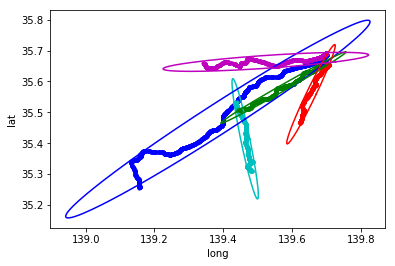

In [58]:
plt.figure()
plt.scatter(小田急電鉄_小田原線.rosenData2[:,0],小田急電鉄_小田原線.rosenData2[:,1], c="b", s=10)
plt.scatter(小田急電鉄_江ノ島線.rosenData2[:,0],小田急電鉄_江ノ島線.rosenData2[:,1], c="c", s=10)
plt.scatter(東京急行電鉄_田園都市線.rosenData2[:,0],東京急行電鉄_田園都市線.rosenData2[:,1], c="g", s=10)
plt.scatter(東京急行電鉄_東横線.rosenData2[:,0],東京急行電鉄_東横線.rosenData2[:,1], c="r", s=10)
plt.scatter(京王電鉄_京王線.rosenData2[:,0],京王電鉄_京王線.rosenData2[:,1], c="m", s=10)
plt.xlabel("long")
plt.ylabel("lat")
plt.plot(小田急電鉄_江ノ島線.curve_c[0],小田急電鉄_江ノ島線.curve_c[1],c="c")
plt.plot(小田急電鉄_小田原線.curve_c[0],小田急電鉄_小田原線.curve_c[1],c="b")
plt.plot(東京急行電鉄_田園都市線.curve_c[0],東京急行電鉄_田園都市線.curve_c[1],c="g")
plt.plot(東京急行電鉄_東横線.curve_c[0],東京急行電鉄_東横線.curve_c[1],c="r")
plt.plot(京王電鉄_京王線.curve_c[0],京王電鉄_京王線.curve_c[1],c="m")

plt.show()

In [110]:
class jikkenData():
    positions=[]
    jikkenDict=[]
    dataUrl=""
    positions2=[]
    collectEki=[]
    collectRosen=""
    ansRosen=[]
    ansEki=[]
    mahas=[]
    rosenList=["odakyu_h","odakyu_e","dento","toyoko","keio_h"]
    def __init__(self, dataUrl):
        self.positions=[]
        self.positions2=[]
        self.mahas=[]
        self.jikkenDict=[]
        self.dataUrl=dataUrl
        self.collectEki=[]
        self.collectRosen=""
        self.ansRosen=[]
        self.ansEki=[]
        self.getData()
        self.getRosenMahas()
        self.getRosen()
        self.getEki()
    def getData(self):
        with open(self.dataUrl,encoding="utf-8") as f:
            l = json.load(f)
            self.jikkenDict = l
            for i in l:
                addlist = []
                addlist.append(i.get('longitude'))
                addlist.append(i.get('latitude')) 
                self.positions.append(addlist)
            self.positions2 = np.copy(self.positions)
    def getRosenMahas(self):
        for i in self.positions:
            addlist = []
            with open('rosenmaha/rosenmaha.json',encoding="utf-8") as f:
                l = json.load(f)
                for j in l:
                    x = np.copy(i)
                    for k in range(2):
                        x[k] = x[k] - j.get("Avg")[k]
                        x[k] = x[k] / j.get("Std")[k]
                    d0 = x
                    d1 = np.dot(d0,np.array(j.get("InvR")))
                    d2 = np.dot(d1,d0)/2
                    addlist.append(d2)
            self.mahas.append(addlist)
    def getRosen(self):
        with open('rosenmaha/rosenmaha.json',encoding="utf-8") as f:
            
            l = json.load(f)                                 
            for i in self.mahas:
                addlist = []
                for j in range(len(i)):
                    if float(i[j]) < 2.48:
                        addlist2 = {}
                        addlist2["rosen"] = l[j].get("name")
                        addlist2["std"] = l[j].get("Std")
                        addlist.append(addlist2)
                addlist_sorted = sorted(addlist, key=lambda x:x['std'])
                self.ansRosen.append(addlist_sorted)
    def getEki(self):
        for i in range(len(self.positions)):
            addlist = []
            for j in self.ansRosen[i]:
                addlist2 = []
                ekiAvg=[]
                ekiStd=[]
                ekiInvR=[]
                ekiInvR2=[]
                ekiname=[]
                with open('ekimaha/'+j.get("rosen")+".json",encoding="utf-8") as f:
                    ekiAvg=[]
                    ekiStd=[]
                    ekiInvR=[]
                    ekiInvR2=[]
                    ekiname=[]
                    l = json.load(f)
                    for data in l:
                        ekiAvg.append(data.get('Avg'))
                        ekiStd.append(data.get('Std'))
                        ekiInvR2.append(data.get('InvR'))
                        ekiname.append(data.get('name'))
                    for m in range(len(ekiAvg)):
                        x = np.copy(self.positions[i])
                        for k in range(2):
                            x[k] = x[k] - ekiAvg[m][k]
                            x[k] = x[k] / ekiStd[m][k]
                        d0 = x
                        d1 = np.dot(d0,np.array(ekiInvR2[m]))
                        d2 = np.dot(d1,d0)/2
                        if d2 < 2.58:
                            addlist2.append(j.get("rosen"))
                            addlist2.append(ekiname[m])
                    addlist.append(addlist2)
            self.ansEki.append(addlist)


In [111]:
#test0702= jikkenData("data/0702test.json")
#test0927=jikkenData("data/0927test.json")
nikotama = jikkenData("data/nikotama.json")


In [114]:
nikotama.ansEki

[[['東京急行電鉄_大井町線', '二子玉川'], ['東京急行電鉄_田園都市線', '二子玉川'], [], [], [], []],
 [[], [], [], [], [], []],
 [[], [], [], [], [], []],
 [['東京急行電鉄_大井町線', '二子玉川'], ['東京急行電鉄_田園都市線', '二子玉川'], [], [], [], []],
 [['東京急行電鉄_大井町線', '二子玉川'], ['東京急行電鉄_田園都市線', '二子玉川'], [], [], [], []],
 [['東京急行電鉄_大井町線', '二子玉川'], ['東京急行電鉄_田園都市線', '二子玉川'], [], [], [], []],
 [['東京急行電鉄_大井町線', '二子玉川'], ['東京急行電鉄_田園都市線', '二子玉川'], [], [], [], []],
 [[], [], [], [], [], []]]

In [94]:
print(test0702.ansEki)

[[[['東京急行電鉄_田園都市線', '青葉台']], [], [], [], [], [], [], []], [[['東京急行電鉄_田園都市線', '青葉台']], [], [], [], [], [], [], []], [[['東京急行電鉄_田園都市線', '青葉台']], [], [], [], [], [], [], []], [[['東京急行電鉄_田園都市線', '青葉台']], [], [], [], [], [], [], []], [[], [], [], [], [], [], [], []], [[['東京急行電鉄_田園都市線', '青葉台']], [], [], [], [], [], [], []], [[['東京急行電鉄_田園都市線', '青葉台']], [], [], [], [], [], [], []], [[['東京急行電鉄_田園都市線', '青葉台']], [], [], [], [], [], [], []], [[['東京急行電鉄_田園都市線', '青葉台']], [], [], [], [], [], [], []], [[['東京急行電鉄_田園都市線', '青葉台']], [], [], [], [], [], [], []], [[], [], [], [], [], [], [], []], [[['東京急行電鉄_田園都市線', '青葉台']], [], [], [], [], [], [], []], [[], [], [], [], [], [], [], []], [[['東京急行電鉄_田園都市線', '青葉台']], [], [], [], [], [], [], []], [[], [], [], [], [], [], [], []], [[['東京急行電鉄_田園都市線', '青葉台']], [], [], [], [], [], [], []], [[['東京急行電鉄_田園都市線', '青葉台']], [], [], [], [], [], [], []], [[['東京急行電鉄_田園都市線', '青葉台']], [], [], [], [], [], [], []], [[['東京急行電鉄_田園都市線', '青葉台']], [], [], [], [], [], [], []], [[['東京急行

In [95]:
print(test0927.ansEki)

[[[['小田急電鉄_江ノ島線', '藤沢']], [], [], []], [[['小田急電鉄_江ノ島線', '藤沢']], [], [], []], [[['小田急電鉄_江ノ島線', '藤沢']], [], [], []], [[['小田急電鉄_江ノ島線', '藤沢本町']], [], [], [], []], [[['小田急電鉄_江ノ島線', '藤沢本町']], [], [], [], []], [[['小田急電鉄_江ノ島線', '藤沢本町']], [], [], [], []], [[['小田急電鉄_江ノ島線', '藤沢本町']], [], [], [], []], [[], [], [], [], []], [[], [], [], [], []], [[['小田急電鉄_江ノ島線', '藤沢本町']], [], [], [], []], [[], [], [], [], []], [[['小田急電鉄_江ノ島線', '善行']], [], [], [], []], [[['小田急電鉄_江ノ島線', '善行']], [], [], [], []], [[['小田急電鉄_江ノ島線', '善行']], [], [], [], []], [[], [], [], [], []], [[], [], [], [], []], [[['小田急電鉄_江ノ島線', '善行']], [], [], [], []], [[], [], [], [], [], []], [[['小田急電鉄_江ノ島線', '六会日大前']], [], [], [], [], []], [[['小田急電鉄_江ノ島線', '六会日大前']], [], [], [], [], []], [[['小田急電鉄_江ノ島線', '六会日大前']], [], [], [], [], []], [[['小田急電鉄_江ノ島線', '六会日大前']], [], [], [], [], []], [[['小田急電鉄_江ノ島線', '六会日大前']], [], [], [], [], []], [[], [], [], [], []], [[['小田急電鉄_江ノ島線', '六会日大前']], [], [], [], [], []], [[['小田急電鉄_江ノ島線', '六会日大前']], [], [], [], [], [